In [ ]:
# MESA Neighbourhoods 

In [3]:
import numpy as np
import pandas as pd
import anndata as ad
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.figure import figaspect

import os
#os.sys.path.append('../../../')
from mesa import ecospatial as eco

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [4]:
from mesa import multiomics

In [ ]:
adata = ad.read_h5ad('adjTMA_PCF_upload.h5ad')

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [12]:
protein= adata.to_df()

In [ ]:
# make sure to use normalised data for.X not the raw values 
adata.X

array([[-1.30880203, -0.35781454, -0.51348294, ...,  3.00679688,
         0.86243318,  3.07754522],
       [-1.54113633, -0.56216099, -0.27679843, ...,  1.23335261,
         2.30797475,  1.11942476],
       [-0.83165828, -0.49726925,  0.20488906, ...,  3.1663941 ,
         2.26919545,  2.52560905],
       ...,
       [-0.73271536, -0.2633303 , -0.53963152, ..., -2.34806874,
         3.85764395, -2.63945599],
       [-1.72688125, -0.44859773, -0.79484588, ...,  0.67238823,
         1.50528676,  0.51759828],
       [-1.82029316,  0.29660559, -0.01155981, ..., -1.70792222,
        -3.51198199, -1.09941204]])

In [148]:
space = adata.obs

In [149]:
space = space[['x','y', 'CT_final', 'unique_core', 'Image']]

In [150]:
space

,x,y,CT_final,unique_core,Image
0,17684.6,941.97,CD4_cells,TMA_A_A8,TMA_A
1,17570.2,952.30,Tumour,TMA_A_A8,TMA_A
2,17663.5,950.24,Tumour,TMA_A_A8,TMA_A
3,17690.0,952.62,Other_Stromal_cells,TMA_A_A8,TMA_A
4,17701.9,952.87,Other_Stromal_cells,TMA_A_A8,TMA_A
...,...,...,...,...,...
1282975,15794.7,25948.80,Fibroblast,TMA_B_J8,TMA_B
1282976,15808.1,25947.60,Tumour,TMA_B_J8,TMA_B
1282977,15816.2,25947.90,Tumour,TMA_B_J8,TMA_B
1282978,15825.7,25947.60,CD8_cells,TMA_B_J8,TMA_B


In [22]:
protein = pd.merge(protein, space[['x','y']], left_index=True, right_index=True, how = 'right')

In [30]:
protein = pd.merge(protein, space[['CT_final']], left_index=True, right_index=True, how = 'right')

In [37]:
protein = pd.merge(protein, space[['unique_core']], left_index=True, right_index=True, how = 'right')

In [151]:
protein = pd.merge(protein, space[['Image']], left_index=True, right_index=True, how = 'right')

In [152]:
protein

,DAPI,CD45RO,HLA-A,CD4,E-cadherin,CD20,CD68,CD8,cd14,CD11c,...,x,y,CT_final,unique_core,cluster_composition,cluster_protein,cluster_protein_order,all_protein,composition,Image
0,-1.308802,-0.357815,-0.513483,-0.338048,-0.362074,0.847417,0.011089,0.585918,-0.059421,-0.270168,...,17684.6,941.97,CD4_cells,TMA_A_A8,4,1,2,"[0.2432576416064146, -0.7182169710040262, -1.0...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A
1,-1.541136,-0.562161,-0.276798,0.058637,-0.225498,0.758327,-0.032708,0.471820,-0.235232,0.978395,...,17570.2,952.30,Tumour,TMA_A_A8,0,1,2,"[0.09639166306890105, -0.9570286655405923, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.15, 0.0...",TMA_A
2,-0.831658,-0.497269,0.204889,-0.476755,-0.178365,0.753563,-0.114409,0.482170,-0.187586,0.277949,...,17663.5,950.24,Tumour,TMA_A_A8,0,1,2,"[0.126544710379622, -0.8713076324171466, -1.01...","[0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.0...",TMA_A
3,0.240842,-0.517146,-0.217305,-0.494390,-0.522050,0.870341,0.039170,0.569297,0.524746,0.342765,...,17690.0,952.62,Other_Stromal_cells,TMA_A_A8,4,1,2,"[0.17481978062623085, -0.9320488142147556, -1....","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A
4,-0.536096,-0.336365,-0.087178,0.205733,-0.340440,0.816723,0.453948,1.098843,2.270436,0.378275,...,17701.9,952.87,Other_Stromal_cells,TMA_A_A8,4,1,2,"[0.3292926704100526, -0.6811747827272624, -0.9...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.05,...",TMA_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,-0.384925,-0.190605,-0.361947,-0.282145,0.025146,0.261691,-0.310848,0.822876,-0.392414,0.199883,...,15794.7,25948.80,Fibroblast,TMA_B_J8,4,9,1,"[0.07143374181320343, -0.10625467910785565, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.15, 0.05...",TMA_B
1282976,-1.348781,-0.533975,-0.754681,-0.651887,0.598128,0.048629,-0.688859,0.771492,-0.793925,-0.030987,...,15808.1,25947.60,Tumour,TMA_B_J8,0,9,1,"[3.9812898241291017, -0.42532306610888126, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B
1282977,-0.732715,-0.263330,-0.539632,-0.410945,0.619299,0.466028,-0.457230,1.370976,-0.588761,0.366357,...,15816.2,25947.90,Tumour,TMA_B_J8,0,9,1,"[1.5877996950364879, -0.12730994099709692, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B
1282978,-1.726881,-0.448598,-0.794846,-0.633581,-0.012609,0.465401,-0.691584,1.599441,-0.856413,0.340498,...,15825.7,25947.60,CD8_cells,TMA_B_J8,0,9,1,"[2.4675610036108147, -0.27814318271674576, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B


In [40]:
protein.columns

Index(['DAPI', 'CD45RO', 'HLA-A', 'CD4', 'E-cadherin', 'CD20', 'CD68', 'CD8',
       'cd14', 'CD11c', 'CD44', 'Vimentin', 'CD45', 'Granzyme B', 'CD34',
       'CD3e', 'LAG3', 'CD31', 'PD-L1', 'ICOS(CD278)', 'NAKATPASE', 'FOXP3',
       'CD19', 'CD163', 'PAX5', 'G6PD', 'PD-1', 'CD21', 'SMA', 'CD11B', 'CD57',
       'HLA-DR', 'pNRF2', 'LDHA', 'ATPA5', 'Collagen IV', 'GLUT1',
       'Hexokinase1', 'ASCT2', 'CITRATE SYNTHASE', 'SDHA', 'IDH2', 'Ki67',
       'Pan-Cytokeratin', 'CPT1A', 'nsize', 'nsolidity', 'ndiameter', 'x', 'y',
       'CT_final', 'unique_core'],
      dtype='object')

In [125]:
# protein expression in protein
protein_features = ['G6PD', 'pNRF2',  'ATPA5',  'GLUT1',
       'Hexokinase1', 'ASCT2', 'CITRATE SYNTHASE', 'SDHA',  'Ki67',
       'Pan-Cytokeratin', 'CPT1A']
protein_exp = protein[protein_features]

<Axes: xlabel='x', ylabel='y'>

/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/naomi/miniforge3/envs/rapids-25.02/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


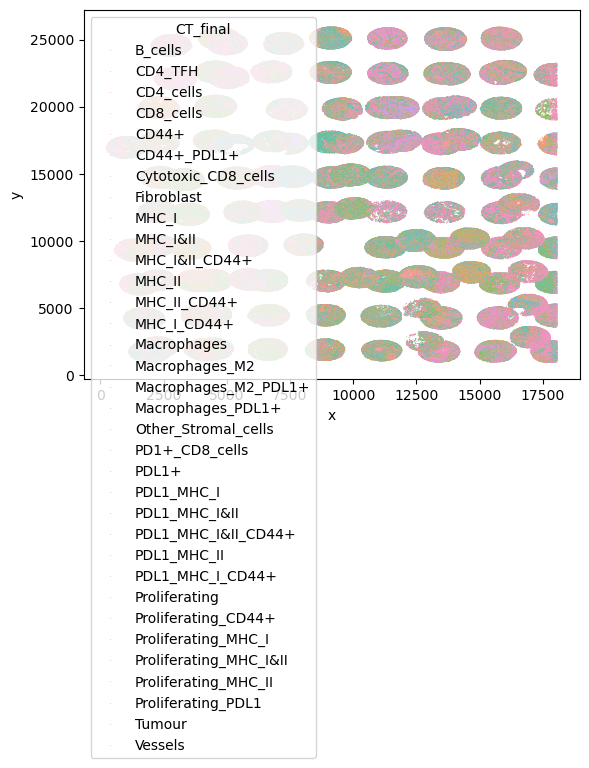

In [44]:
sns.scatterplot(data=protein, x="x", y="y", hue = "CT_final", s = 0.3)

In [126]:
protein_active = adata.X
protein_active = protein_active[:, protein_active.std(axis=0) > 1e-5]

# Neighbourhood characterisation

In [153]:
TMA_A = protein[protein['Image']=='TMA_A']
TMA_B = protein[protein['Image']=='TMA_B']

In [156]:
#locations= protein[['x', 'y']].values

sample_groups = protein.groupby('unique_core')

# Create a dictionary where each key is a sample name and each value is an array of shape (n_cells, 2)
locations = {
    sample: group[['x', 'y']].values
    for sample, group in sample_groups
}

/tmp/ipykernel_25087/1841097446.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_groups = protein.groupby('unique_core')


In [157]:
locations

{'TMA_A_A1': array([[2276.4, 1257.7],
        [2254.4, 1261.8],
        [2234.1, 1265.9],
        ...,
        [2237.7, 2878.7],
        [2295.6, 2879.8],
        [2249.9, 2883.7]]),
 'TMA_A_A2': array([[4415.5, 1106.6],
        [4385.9, 1107.3],
        [4397.1, 1107.8],
        ...,
        [4514.9, 2771.9],
        [4504.7, 2773.3],
        [4544.6, 2773.1]]),
 'TMA_A_A3': array([[6690.3, 1086.7],
        [6644.9, 1085.8],
        [6573. , 1088.5],
        ...,
        [6524.3, 2748.6],
        [6595. , 2749.5],
        [6616. , 2751. ]]),
 'TMA_A_A4': array([[8704.9, 1089.1],
        [8711.7, 1090.5],
        [8719.7, 1095.3],
        ...,
        [9046.6, 2707.2],
        [9012.2, 2706.9],
        [9059.6, 2708.2]]),
 'TMA_A_A5': array([[11208.6,  1046.4],
        [11157.3,  1054.3],
        [11192.5,  1055. ],
        ...,
        [11164.3,  2604.2],
        [11154.7,  2604. ],
        [11146.9,  2605.7]]),
 'TMA_A_A6': array([[13466.8 ,   946.81],
        [13456.2 ,   947.32],
 

In [159]:
for sample, group in protein.groupby('unique_core'):
    locations = group[['x', 'y']].values  # (n_cells, 2)
    feature_labels = group['CT_final'].values  # labels for each cell in that sample

    spatial_knn_indices = multiomics.multiomics_spatial.get_spatial_knn_indices(
        locations=locations,
        n_neighbors=ks,
        method='kd_tree'
    )

    cell_nbhd = multiomics.multiomics_spatial.get_neighborhood_composition(
        knn_indices=spatial_knn_indices,
        labels=feature_labels,
        all_labels=unique_feature_labels
    )

    # Do something with cell_nbhd here...


/tmp/ipykernel_25087/2439621540.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for sample, group in protein.groupby('unique_core'):


In [187]:
protein['x_adjusted'] = protein['x']  # copy original values
  
if protein['Image'].str.contains('TMA_B').any():
    protein.loc[protein['x'] == value, 'x_adjusted'] += 20000


In [198]:
protein['x']

0           17684.6
1           17570.2
2           17663.5
3           17690.0
4           17701.9
             ...   
1282975    215794.7
1282976    215808.1
1282977    215816.2
1282978    215825.7
1282979    215759.2
Name: x, Length: 1282980, dtype: float64

In [197]:
protein.loc[protein['Image'] == 'TMA_B', 'x'] += 200000

In [188]:
protein

,DAPI,CD45RO,HLA-A,CD4,E-cadherin,CD20,CD68,CD8,cd14,CD11c,...,y,CT_final,unique_core,cluster_composition,cluster_protein,cluster_protein_order,all_protein,composition,Image,x_adjusted
0,-1.308802,-0.357815,-0.513483,-0.338048,-0.362074,0.847417,0.011089,0.585918,-0.059421,-0.270168,...,941.97,CD4_cells,TMA_A_A8,4,1,2,"[0.2432576416064146, -0.7182169710040262, -1.0...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A,17684.6
1,-1.541136,-0.562161,-0.276798,0.058637,-0.225498,0.758327,-0.032708,0.471820,-0.235232,0.978395,...,952.30,Tumour,TMA_A_A8,0,1,2,"[0.09639166306890105, -0.9570286655405923, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.15, 0.0...",TMA_A,17570.2
2,-0.831658,-0.497269,0.204889,-0.476755,-0.178365,0.753563,-0.114409,0.482170,-0.187586,0.277949,...,950.24,Tumour,TMA_A_A8,0,1,2,"[0.126544710379622, -0.8713076324171466, -1.01...","[0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.0...",TMA_A,17663.5
3,0.240842,-0.517146,-0.217305,-0.494390,-0.522050,0.870341,0.039170,0.569297,0.524746,0.342765,...,952.62,Other_Stromal_cells,TMA_A_A8,4,1,2,"[0.17481978062623085, -0.9320488142147556, -1....","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A,17690.0
4,-0.536096,-0.336365,-0.087178,0.205733,-0.340440,0.816723,0.453948,1.098843,2.270436,0.378275,...,952.87,Other_Stromal_cells,TMA_A_A8,4,1,2,"[0.3292926704100526, -0.6811747827272624, -0.9...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.05,...",TMA_A,17701.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,-0.384925,-0.190605,-0.361947,-0.282145,0.025146,0.261691,-0.310848,0.822876,-0.392414,0.199883,...,25948.80,Fibroblast,TMA_B_J8,4,9,1,"[0.07143374181320343, -0.10625467910785565, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.15, 0.05...",TMA_B,15794.7
1282976,-1.348781,-0.533975,-0.754681,-0.651887,0.598128,0.048629,-0.688859,0.771492,-0.793925,-0.030987,...,25947.60,Tumour,TMA_B_J8,0,9,1,"[3.9812898241291017, -0.42532306610888126, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15808.1
1282977,-0.732715,-0.263330,-0.539632,-0.410945,0.619299,0.466028,-0.457230,1.370976,-0.588761,0.366357,...,25947.90,Tumour,TMA_B_J8,0,9,1,"[1.5877996950364879, -0.12730994099709692, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15816.2
1282978,-1.726881,-0.448598,-0.794846,-0.633581,-0.012609,0.465401,-0.691584,1.599441,-0.856413,0.340498,...,25947.60,CD8_cells,TMA_B_J8,0,9,1,"[2.4675610036108147, -0.27814318271674576, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15825.7


In [199]:
# Get neighborhood composition
ks = 20
locations = protein[['x', 'y']].values
feature_labels = protein['CT_final'].values
unique_feature_labels = sorted(protein['CT_final'].unique())
spatial_knn_indices = multiomics.multiomics_spatial.get_spatial_knn_indices(locations=locations, n_neighbors=ks, method='kd_tree')
cell_nbhd = multiomics.multiomics_spatial.get_neighborhood_composition(knn_indices=spatial_knn_indices, labels=feature_labels, all_labels=unique_feature_labels)

In [200]:
n_cluster = 10
kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(cell_nbhd)
#print(kmeans.labels_)
protein['cluster_composition'] = kmeans.labels_.astype(str)

In [52]:
protein[protein['unique_core']=='TMA_A_A6']

,DAPI,CD45RO,HLA-A,CD4,E-cadherin,CD20,CD68,CD8,cd14,CD11c,...,Pan-Cytokeratin,CPT1A,nsize,nsolidity,ndiameter,x,y,CT_final,unique_core,cluster_composition
91973,-1.590076,-0.340876,-0.242508,-0.363308,0.378468,0.338343,-0.329318,0.051033,-0.658000,0.559027,...,3.013447,2.478452,-0.450365,1.278779,-0.417680,13466.8,946.81,Tumour,TMA_A_A6,4
91974,-0.749064,-0.441964,-0.381859,-0.455670,0.206621,-0.026948,-0.473268,-0.202499,-0.635733,0.107895,...,4.082161,3.586915,0.140578,0.384489,0.490927,13456.2,947.32,Tumour,TMA_A_A6,4
91975,-1.605226,-0.376608,-0.296068,-0.394973,-0.628260,0.179504,-0.367144,-0.055731,-0.636253,0.360190,...,3.994917,2.373756,0.751508,0.559430,0.980843,13446.0,952.37,Tumour,TMA_A_A6,4
91976,-1.423078,-0.746493,-0.535733,-0.287992,-0.749939,0.228777,-0.355456,0.017172,-0.505034,0.391311,...,3.637049,2.600093,-0.774366,1.591263,-0.939451,13461.6,959.41,Tumour,TMA_A_A6,4
91977,-1.672863,-0.181566,-0.083807,0.393131,-0.827186,0.493443,-0.170079,0.207915,0.828013,0.712760,...,-0.437633,-0.064438,1.630740,-1.907641,2.443433,13407.4,958.83,Fibroblast,TMA_A_A6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105946,-0.922515,-0.052423,-0.409487,-0.672648,-0.698917,0.623499,0.146474,0.337584,-0.368007,-0.598430,...,2.726859,-0.473047,0.976470,3.233062,0.577172,13320.3,2601.00,Tumour,TMA_A_A6,4
105947,-0.800330,-0.023720,-0.087682,-0.500997,-0.949557,0.000796,0.329936,-0.204676,2.147499,-0.359292,...,2.259920,-0.014133,-1.721031,-0.390059,-1.020248,13291.3,2601.80,Macrophages_M2,TMA_A_A6,4
105948,-0.590019,0.154434,-0.252083,-0.551691,-0.581599,0.923971,0.167529,0.598457,-0.204858,-0.467195,...,2.102097,-0.324446,-0.520167,1.956747,-0.310273,13309.9,2602.70,Tumour,TMA_A_A6,4
105949,-0.990980,-0.453343,-0.368879,-0.472604,-1.011169,0.129874,1.593847,-0.116827,2.135388,-0.302466,...,0.586088,0.111950,-1.188511,1.674952,-1.387757,13331.7,2603.70,Macrophages,TMA_A_A6,4


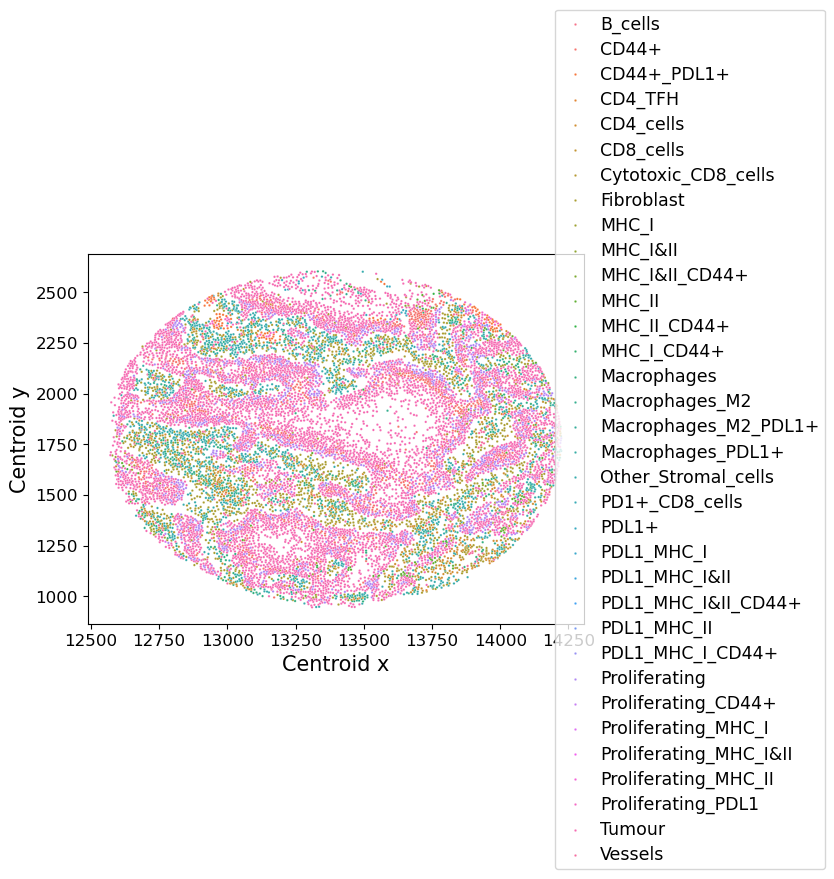

In [68]:
sns.scatterplot(data=protein[protein['unique_core']=='TMA_A_A6'], x="x", y="y", hue="CT_final",
                hue_order=cell_type_order, s = 3, rasterized=True)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.xlabel("Centroid x", fontsize=15)
plt.ylabel("Centroid y", fontsize=15)

legend = plt.legend(title='', loc='right',bbox_to_anchor=(1.5, 0.5))
legend.get_title().set_fontsize('0')
for label in legend.get_texts():
    label.set_fontsize(12.5)

#plt.savefig('../figures/tonsil/tonsil_ct_composition.png')
plt.savefig('./figures/CT_TMA_A_A6.svg', dpi=300)
plt.show()

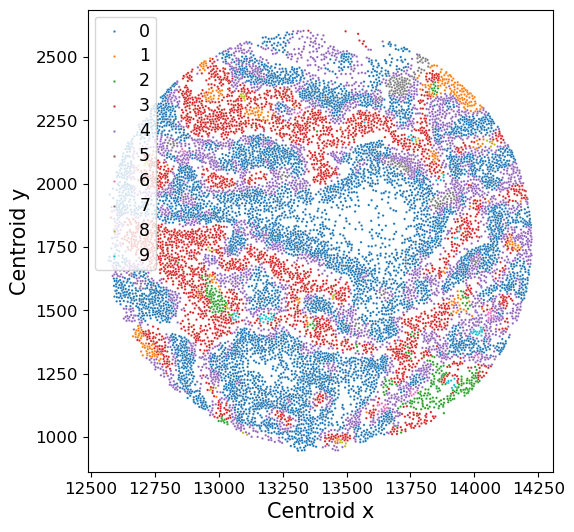

In [69]:
cell_type_order = sorted(protein['CT_final'].unique())
order_clusters_composition = sorted(protein['cluster_composition'].unique())

plt.figure(figsize=(6, 6))
sns.scatterplot(data=protein[protein['unique_core']=='TMA_A_A6'], x="x", y="y", hue="cluster_composition",
                hue_order=order_clusters_composition, s = 3, rasterized=True)

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.xlabel("Centroid x", fontsize=15)
plt.ylabel("Centroid y", fontsize=15)

legend = plt.legend(title='', loc='upper left')
legend.get_title().set_fontsize('0')
for label in legend.get_texts():
    label.set_fontsize(12.5)

#plt.savefig('../figures/tonsil/tonsil_ct_composition.png')
plt.savefig('./figures/CT_final_nb_TMA_A_A6.svg', dpi=300)
plt.show()

In [481]:
protein_exp

,G6PD,pNRF2,ATPA5,GLUT1,Hexokinase1,ASCT2,CITRATE SYNTHASE,SDHA,Ki67,Pan-Cytokeratin,CPT1A
0,0.243258,-0.718217,-1.025501,-0.282407,0.145467,0.036940,-0.455090,-1.660459,0.884949,-0.072377,-0.155491
1,0.096392,-0.957029,-1.108595,-0.427990,0.104618,-0.129656,-0.262843,-1.513545,0.094256,0.044472,0.198534
2,0.126545,-0.871308,-1.014879,-0.370176,0.025054,-0.087579,-0.470039,-1.511096,0.792515,-0.131421,-0.287291
3,0.174820,-0.932049,-1.091305,-0.376168,0.062241,-0.062698,-0.486941,-1.766711,0.913548,-0.188545,-0.284228
4,0.329293,-0.681175,-0.975164,-0.174189,0.145142,0.041310,-0.429432,-1.582651,0.236837,-0.127451,-0.142795
...,...,...,...,...,...,...,...,...,...,...,...
1282975,0.071434,-0.106255,-0.376559,-0.390646,-0.195257,-0.132723,-0.506676,0.137744,0.093083,-0.010774,0.440539
1282976,3.981290,-0.425323,-0.428478,-0.791648,-0.211302,-0.459417,-0.400729,0.235886,-0.168556,0.436136,0.279002
1282977,1.587800,-0.127310,-0.347203,-0.585910,-0.065091,-0.169992,-0.434746,-0.822106,0.194135,0.363613,-1.470167
1282978,2.467561,-0.278143,-0.553703,-0.959830,-0.200174,-0.331630,-0.239560,-0.602846,-1.854841,0.337059,0.826815


In [201]:
# Get average protein expression of local neighborhoods
avg_exp = multiomics.multiomics_spatial.get_avg_expression_neighbors(protein_exp, spatial_knn_indices)
avg_exp_df = np.stack(avg_exp)

Computing avg expression: 100%|█████████████████████████████████████████████| 1282980/1282980 [04:05<00:00, 5224.41it/s]


In [202]:
n_cluster = 10
kmeans_protein = KMeans(n_clusters=n_cluster, random_state=0).fit(avg_exp_df)
protein['cluster_protein'] = kmeans_protein.labels_.astype(str)

In [203]:
# reorder colors to be consistent
order_clusters_protein = sorted(protein['cluster_protein'].unique())
protein['cluster_protein_order'] = protein['cluster_protein']
index1 = protein[protein['cluster_protein_order'] == '1'].index
index2 = protein[protein['cluster_protein_order'] == '9'].index
protein.loc[index1, 'cluster_protein_order'] = '9'
protein.loc[index2, 'cluster_protein_order'] = '1'

index3 = protein[protein['cluster_protein_order'] == '7'].index
index4 = protein[protein['cluster_protein_order'] == '2'].index
protein.loc[index3, 'cluster_protein_order'] = '2'
protein.loc[index4, 'cluster_protein_order'] = '7'

index5 = protein[protein['cluster_protein_order'] == '0'].index
index6 = protein[protein['cluster_protein_order'] == '5'].index
protein.loc[index5, 'cluster_protein_order'] = '5'
protein.loc[index6, 'cluster_protein_order'] = '0'

index7 = protein[protein['cluster_protein_order'] == '2'].index
index8 = protein[protein['cluster_protein_order'] == '9'].index
protein.loc[index7, 'cluster_protein_order'] = '9'
protein.loc[index8, 'cluster_protein_order'] = '2'

In [253]:
cluster_protein_order

,DAPI,CD45RO,HLA-A,CD4,E-cadherin,CD20,CD68,CD8,cd14,CD11c,...,y,CT_final,unique_core,cluster_composition,cluster_protein,cluster_protein_order,all_protein,composition,Image,x_adjusted
0,-1.308802,-0.357815,-0.513483,-0.338048,-0.362074,0.847417,0.011089,0.585918,-0.059421,-0.270168,...,941.97,CD4_cells,TMA_A_A8,1,0,5,"[0.2432576416064146, -0.7182169710040262, -1.0...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A,17684.6
1,-1.541136,-0.562161,-0.276798,0.058637,-0.225498,0.758327,-0.032708,0.471820,-0.235232,0.978395,...,952.30,Tumour,TMA_A_A8,0,0,5,"[0.09639166306890105, -0.9570286655405923, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.15, 0.0...",TMA_A,17570.2
2,-0.831658,-0.497269,0.204889,-0.476755,-0.178365,0.753563,-0.114409,0.482170,-0.187586,0.277949,...,950.24,Tumour,TMA_A_A8,0,0,5,"[0.126544710379622, -0.8713076324171466, -1.01...","[0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.0...",TMA_A,17663.5
3,0.240842,-0.517146,-0.217305,-0.494390,-0.522050,0.870341,0.039170,0.569297,0.524746,0.342765,...,952.62,Other_Stromal_cells,TMA_A_A8,1,0,5,"[0.17481978062623085, -0.9320488142147556, -1....","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A,17690.0
4,-0.536096,-0.336365,-0.087178,0.205733,-0.340440,0.816723,0.453948,1.098843,2.270436,0.378275,...,952.87,Other_Stromal_cells,TMA_A_A8,1,0,5,"[0.3292926704100526, -0.6811747827272624, -0.9...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.05,...",TMA_A,17701.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,-0.384925,-0.190605,-0.361947,-0.282145,0.025146,0.261691,-0.310848,0.822876,-0.392414,0.199883,...,25948.80,Fibroblast,TMA_B_J8,1,8,8,"[0.07143374181320343, -0.10625467910785565, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.15, 0.05...",TMA_B,15794.7
1282976,-1.348781,-0.533975,-0.754681,-0.651887,0.598128,0.048629,-0.688859,0.771492,-0.793925,-0.030987,...,25947.60,Tumour,TMA_B_J8,0,8,8,"[3.9812898241291017, -0.42532306610888126, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15808.1
1282977,-0.732715,-0.263330,-0.539632,-0.410945,0.619299,0.466028,-0.457230,1.370976,-0.588761,0.366357,...,25947.90,Tumour,TMA_B_J8,0,8,8,"[1.5877996950364879, -0.12730994099709692, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15816.2
1282978,-1.726881,-0.448598,-0.794846,-0.633581,-0.012609,0.465401,-0.691584,1.599441,-0.856413,0.340498,...,25947.60,CD8_cells,TMA_B_J8,0,8,8,"[2.4675610036108147, -0.27814318271674576, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15825.7


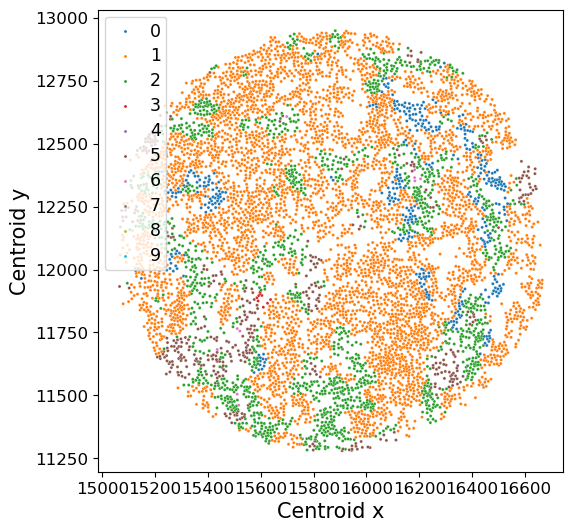

In [231]:
#core = 'TMA_B_E1'

plt.figure(figsize=(6, 6))
sns.scatterplot(data=protein[protein['unique_core']=='TMA_A_E7'], x="x", y="y", hue="cluster_protein_order",
                hue_order=order_clusters_protein, s=5, rasterized=True)#,
                #palette="bright")

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.xlabel("Centroid x", fontsize=15)
plt.ylabel("Centroid y", fontsize=15)

legend = plt.legend(title='', loc='upper left')
legend.get_title().set_fontsize('10')
for label in legend.get_texts():
    label.set_fontsize(12.5)

#plt.savefig('../figures/tonsil/tonsil_avgprotein_order.png')
#plt.savefig(f'./figures/protein_metabolic_nb_TMA_A_A6.svg', dpi=300)
plt.show()

In [607]:
protein

,DAPI,CD45RO,HLA-A,CD4,E-cadherin,CD20,CD68,CD8,cd14,CD11c,...,unique_core,cluster_composition,cluster_protein,cluster_protein_order,all_protein,composition,Image,x_adjusted,protein_exp_nb,nb_immune
0,-1.308802,-0.357815,-0.513483,-0.338048,-0.362074,0.847417,0.011089,0.585918,-0.059421,-0.270168,...,TMA_A_A8,1,0,5,"[0.2432576416064146, -0.7182169710040262, -1.0...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A,17684.6,low,CD4_cells
1,-1.541136,-0.562161,-0.276798,0.058637,-0.225498,0.758327,-0.032708,0.471820,-0.235232,0.978395,...,TMA_A_A8,0,0,5,"[0.09639166306890105, -0.9570286655405923, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.15, 0.0...",TMA_A,17570.2,low,low
2,-0.831658,-0.497269,0.204889,-0.476755,-0.178365,0.753563,-0.114409,0.482170,-0.187586,0.277949,...,TMA_A_A8,0,0,5,"[0.126544710379622, -0.8713076324171466, -1.01...","[0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.0...",TMA_A,17663.5,low,low
3,0.240842,-0.517146,-0.217305,-0.494390,-0.522050,0.870341,0.039170,0.569297,0.524746,0.342765,...,TMA_A_A8,1,0,5,"[0.17481978062623085, -0.9320488142147556, -1....","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A,17690.0,low,Other_Stromal_cells
4,-0.536096,-0.336365,-0.087178,0.205733,-0.340440,0.816723,0.453948,1.098843,2.270436,0.378275,...,TMA_A_A8,1,0,5,"[0.3292926704100526, -0.6811747827272624, -0.9...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.05,...",TMA_A,17701.9,low,Other_Stromal_cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,-0.384925,-0.190605,-0.361947,-0.282145,0.025146,0.261691,-0.310848,0.822876,-0.392414,0.199883,...,TMA_B_J8,1,8,8,"[0.07143374181320343, -0.10625467910785565, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.15, 0.05...",TMA_B,15794.7,Glutamineimport_PPP,Fibroblast
1282976,-1.348781,-0.533975,-0.754681,-0.651887,0.598128,0.048629,-0.688859,0.771492,-0.793925,-0.030987,...,TMA_B_J8,0,8,8,"[3.9812898241291017, -0.42532306610888126, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15808.1,Glutamineimport_PPP,Glutamineimport_PPP
1282977,-0.732715,-0.263330,-0.539632,-0.410945,0.619299,0.466028,-0.457230,1.370976,-0.588761,0.366357,...,TMA_B_J8,0,8,8,"[1.5877996950364879, -0.12730994099709692, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15816.2,Glutamineimport_PPP,Glutamineimport_PPP
1282978,-1.726881,-0.448598,-0.794846,-0.633581,-0.012609,0.465401,-0.691584,1.599441,-0.856413,0.340498,...,TMA_B_J8,0,8,8,"[2.4675610036108147, -0.27814318271674576, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15825.7,Glutamineimport_PPP,CD8_cells


In [616]:
protein.columns

Index(['DAPI', 'CD45RO', 'HLA-A', 'CD4', 'E-cadherin', 'CD20', 'CD68', 'CD8',
       'cd14', 'CD11c', 'CD44', 'Vimentin', 'CD45', 'Granzyme B', 'CD34',
       'CD3e', 'LAG3', 'CD31', 'PD-L1', 'ICOS(CD278)', 'NAKATPASE', 'FOXP3',
       'CD19', 'CD163', 'PAX5', 'G6PD', 'PD-1', 'CD21', 'SMA', 'CD11B', 'CD57',
       'HLA-DR', 'pNRF2', 'LDHA', 'ATPA5', 'Collagen IV', 'GLUT1',
       'Hexokinase1', 'ASCT2', 'CITRATE SYNTHASE', 'SDHA', 'IDH2', 'Ki67',
       'Pan-Cytokeratin', 'CPT1A', 'nsize', 'nsolidity', 'ndiameter', 'x', 'y',
       'CT_final', 'unique_core', 'cluster_composition', 'cluster_protein',
       'cluster_protein_order', 'all_protein', 'composition', 'Image',
       'x_adjusted', 'protein_exp_nb', 'nb_immune'],
      dtype='object')

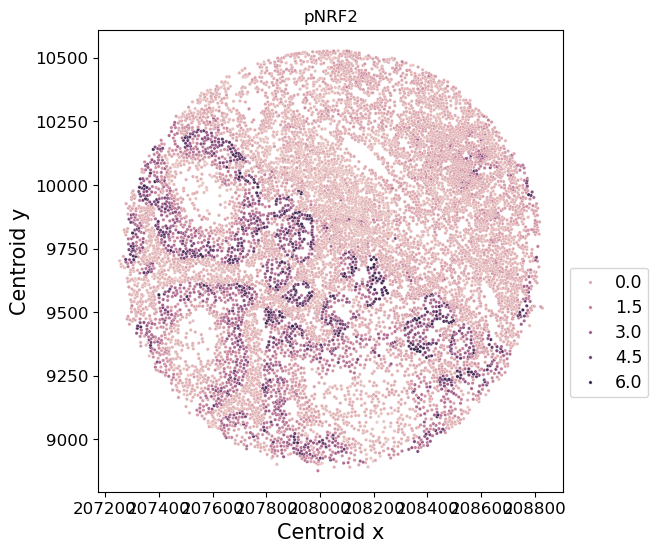

In [641]:
#core = 'TMA_B_E1'

plt.figure(figsize=(6, 6))
sns.scatterplot(data=protein[protein['unique_core']=='TMA_B_D4'], x="x", y="y", hue="pNRF2",
                #palette = color_dict,
                 s=6, rasterized=True)#,
                #palette="bright")

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.xlabel("Centroid x", fontsize=15)
plt.ylabel("Centroid y", fontsize=15)
plt.title('pNRF2')

legend = plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 0.5))
legend.get_title().set_fontsize('10')
for label in legend.get_texts():
    label.set_fontsize(12.5)

#plt.savefig('../figures/tonsil/tonsil_avgprotein_order.png')
plt.savefig(f'./figures/pNRF2_TMA_B_D4.svg', dpi=300)
plt.show()

In [108]:
cluster_composition

,B_cells,CD44+,CD44+_PDL1+,CD4_TFH,CD4_cells,CD8_cells,Cytotoxic_CD8_cells,Fibroblast,MHC_I,MHC_I&II,...,PDL1_MHC_II,PDL1_MHC_I_CD44+,Proliferating,Proliferating_CD44+,Proliferating_MHC_I,Proliferating_MHC_I&II,Proliferating_MHC_II,Proliferating_PDL1,Tumour,Vessels
0,0.002337,0.000919,0.000115,0.000350,0.046188,0.145676,0.000100,0.119627,0.006887,0.000680,...,0.000922,0.000380,0.005338,0.000000,0.001591,0.000415,0.000000,0.012733,0.101437,0.028140
1,0.013320,0.058169,0.000884,0.001937,0.037098,0.038458,0.000711,0.089590,0.016339,0.007738,...,0.005049,0.000199,0.015897,0.006997,0.006679,0.000891,0.002377,0.000770,0.223643,0.094233
2,0.001380,0.021020,0.012828,0.000990,0.020251,0.022674,0.000768,0.039152,0.036557,0.028792,...,0.002537,0.002486,0.092816,0.002619,0.021359,0.003419,0.003291,0.009368,0.412879,0.019299
3,0.010466,0.013531,0.007114,0.003949,0.068947,0.049023,0.002702,0.053298,0.055263,0.026415,...,0.004242,0.011066,0.020514,0.001397,0.017413,0.010781,0.001811,0.009512,0.179232,0.038210
4,0.022503,0.006708,0.000239,0.016643,0.203576,0.040164,0.000613,0.126992,0.007486,0.009707,...,0.005558,0.000213,0.003787,0.000969,0.001032,0.002993,0.007053,0.000322,0.053430,0.072655
5,0.012312,0.007720,0.000404,0.000564,0.046682,0.046647,0.000563,0.136301,0.023812,0.000219,...,0.000343,0.000089,0.003453,0.000302,0.000574,0.000037,0.000450,0.000124,0.299120,0.100932
6,0.021228,0.020804,0.000424,0.002087,0.084913,0.062537,0.001306,0.175731,0.007074,0.001882,...,0.000216,0.000229,0.003804,0.001392,0.001394,0.000281,0.000377,0.000271,0.072773,0.109968
7,0.100576,0.003836,0.000872,0.013472,0.207747,0.125343,0.011495,0.052576,0.006009,0.005792,...,0.000406,0.001569,0.002431,0.000599,0.003270,0.003869,0.001219,0.001057,0.027682,0.039791
8,0.000965,0.357622,0.060810,0.001052,0.007669,0.015450,0.002214,0.023645,0.012363,0.001990,...,0.001604,0.008406,0.038330,0.055934,0.012527,0.001126,0.001270,0.023586,0.205546,0.014528
9,0.002265,0.056490,0.000182,0.001774,0.024707,0.021590,0.000648,0.053937,0.029714,0.003460,...,0.000356,0.000091,0.074315,0.008166,0.006938,0.000567,0.002588,0.000261,0.511982,0.026614


In [205]:
# calculate the average protein expression for each cluster
protein['all_protein'] = protein_exp.values.tolist()
cluster_avg_exp = protein.groupby('cluster_protein_order')['all_protein'].apply(lambda x: np.mean(x.tolist(), axis=0))
cluster_avg_exp = np.stack(cluster_avg_exp.values)
cluster_avg_exp = pd.DataFrame(cluster_avg_exp, columns=protein_features)

# calculate the average cellular composition based on cell_nbhd for each cluster
protein['composition'] = cell_nbhd.tolist()
cluster_composition = protein.groupby('cluster_protein_order')['composition'].apply(lambda x: np.mean(x.tolist(), axis=0))
cluster_composition = np.stack(cluster_composition.values)
cluster_composition = pd.DataFrame(cluster_composition, columns=np.unique(list(feature_labels)))

# scale RNA expression to 0-1 to be comparable with protein expression
#scaler = MinMaxScaler()
#rna_matched_protein_order_scale = scaler.fit_transform(rna_matched_protein_order)
#rna_matched_protein_order_scale = pd.DataFrame(rna_matched_protein_order_scale, columns=rna_adata.var_names)
#
## calculate the average RNA expression for each cluster
#protein['all_rna'] = rna_matched_protein_order_scale.values.tolist()
#cluster_avg_exp_rna = protein.groupby('cluster_protein_order')['all_rna'].apply(lambda x: np.mean(x.tolist(), axis=0))
#cluster_avg_exp_rna = np.stack(cluster_avg_exp_rna.values)
#cluster_avg_exp_rna = pd.DataFrame(cluster_avg_exp_rna, columns=rna_matched_protein_order_scale.columns)
#
## select highly variable RNAs
#var_rna = cluster_avg_exp_rna.var()
#top_variance_columns = var_rna.sort_values(ascending=False).head(50)
#top_variance_column_names = top_variance_columns.index.tolist()
#cluster_avg_exp_rna_variable = cluster_avg_exp_rna[top_variance_column_names]

In [232]:
cluster_avg_exp

,G6PD,pNRF2,ATPA5,GLUT1,Hexokinase1,ASCT2,CITRATE SYNTHASE,SDHA,Ki67,Pan-Cytokeratin,CPT1A
0,0.088481,0.196034,1.684475,-0.515779,0.053463,-0.016100,1.863806,1.088242,0.188105,0.271781,0.221867
1,-0.331320,0.328292,-0.058656,0.683171,-0.100555,0.127851,0.175753,0.322840,0.450355,2.899433,0.315070
2,-0.296763,0.075793,0.111317,-0.436637,-0.131893,-0.244041,0.203745,0.416498,-0.175789,0.147455,-0.190052
3,0.009750,0.226881,0.539223,0.042230,-0.055983,0.254853,-0.148096,-0.103492,0.082919,0.173620,2.119048
4,1.548033,-0.314378,-0.243445,1.265611,2.546047,1.810771,0.292649,0.087999,0.525339,0.498045,0.070865
5,0.055469,-0.605135,-0.476395,-0.061660,-0.054402,-0.029787,-0.385655,-0.872724,0.202293,-0.085783,-0.323100
6,-0.550761,-0.191381,-0.358748,-0.469110,-0.307988,-0.398792,-0.527445,-0.477109,-0.392516,-0.741824,-0.306052
7,0.155416,-0.091638,-0.332143,3.128921,0.017358,0.763945,-0.259331,-0.012721,0.194405,1.139080,-0.112794
8,2.749377,-0.071929,-0.057118,-0.234586,-0.239987,0.002442,-0.079654,-0.247645,0.183033,-0.017913,0.006599
9,-0.306494,1.972396,0.202023,0.153453,-0.362938,0.295509,0.347161,0.933298,0.672453,0.171965,-0.146940


In [534]:
comb_df #= pd.concat([cluster_composition, cluster_avg_exp], axis=1)

,B_cells,CD44+,CD44+_PDL1+,CD4_TFH,CD4_cells,CD8_cells,Cytotoxic_CD8_cells,Fibroblast,MHC_I,MHC_I&II,...,pNRF2,ATPA5,GLUT1,Hexokinase1,ASCT2,CITRATE SYNTHASE,SDHA,Ki67,Pan-Cytokeratin,CPT1A
0,0.002649,0.013650,0.000181,0.001107,0.031768,0.023283,0.000411,0.031305,0.018661,0.038808,...,0.196034,1.684475,-0.515779,0.053463,-0.016100,1.863806,1.088242,0.188105,0.271781,0.221867
1,0.001073,0.271446,0.012334,0.001069,0.009453,0.016447,0.002948,0.031345,0.014304,0.012029,...,0.328292,-0.058656,0.683171,-0.100555,0.127851,0.175753,0.322840,0.450355,2.899433,0.315070
2,0.014259,0.017363,0.000914,0.004779,0.067425,0.049787,0.001402,0.069758,0.025783,0.023718,...,0.075793,0.111317,-0.436637,-0.131893,-0.244041,0.203745,0.416498,-0.175789,0.147455,-0.190052
3,0.003349,0.108726,0.001562,0.001950,0.029613,0.030221,0.000394,0.084321,0.019632,0.002398,...,0.226881,0.539223,0.042230,-0.055983,0.254853,-0.148096,-0.103492,0.082919,0.173620,2.119048
4,0.001151,0.142083,0.130657,0.002201,0.012407,0.024637,0.001917,0.033182,0.013160,0.001396,...,-0.314378,-0.243445,1.265611,2.546047,1.810771,0.292649,0.087999,0.525339,0.498045,0.070865
5,0.009298,0.020728,0.001494,0.001722,0.056287,0.046103,0.001421,0.132543,0.036731,0.002547,...,-0.605135,-0.476395,-0.061660,-0.054402,-0.029787,-0.385655,-0.872724,0.202293,-0.085783,-0.323100
6,0.065298,0.004989,0.000377,0.010169,0.175340,0.095068,0.006145,0.111294,0.003516,0.004352,...,-0.191381,-0.358748,-0.469110,-0.307988,-0.398792,-0.527445,-0.477109,-0.392516,-0.741824,-0.306052
7,0.000581,0.294422,0.036113,0.000700,0.006985,0.015634,0.002262,0.031038,0.026344,0.000444,...,-0.091638,-0.332143,3.128921,0.017358,0.763945,-0.259331,-0.012721,0.194405,1.139080,-0.112794
8,0.002618,0.056255,0.000349,0.000942,0.024752,0.022370,0.000195,0.049171,0.033078,0.003468,...,-0.071929,-0.057118,-0.234586,-0.239987,0.002442,-0.079654,-0.247645,0.183033,-0.017913,0.006599
9,0.003689,0.030822,0.000540,0.001907,0.020556,0.032089,0.001551,0.063596,0.055751,0.021337,...,1.972396,0.202023,0.153453,-0.362938,0.295509,0.347161,0.933298,0.672453,0.171965,-0.146940


In [540]:
cluster_avg_exp.reset_index()

,index,G6PD,pNRF2,ATPA5,GLUT1,Hexokinase1,ASCT2,CITRATE SYNTHASE,SDHA,Ki67,Pan-Cytokeratin,CPT1A
0,Oxphos,0.088481,0.196034,1.684475,-0.515779,0.053463,-0.016100,1.863806,1.088242,0.188105,0.271781,0.221867
1,Hypoxic,-0.331320,0.328292,-0.058656,0.683171,-0.100555,0.127851,0.175753,0.322840,0.450355,2.899433,0.315070
2,low,-0.296763,0.075793,0.111317,-0.436637,-0.131893,-0.244041,0.203745,0.416498,-0.175789,0.147455,-0.190052
3,Lipid_oxidation,0.009750,0.226881,0.539223,0.042230,-0.055983,0.254853,-0.148096,-0.103492,0.082919,0.173620,2.119048
4,Hypoxic_glutamineimport_PPP,1.548033,-0.314378,-0.243445,1.265611,2.546047,1.810771,0.292649,0.087999,0.525339,0.498045,0.070865
5,low,0.055469,-0.605135,-0.476395,-0.061660,-0.054402,-0.029787,-0.385655,-0.872724,0.202293,-0.085783,-0.323100
6,low,-0.550761,-0.191381,-0.358748,-0.469110,-0.307988,-0.398792,-0.527445,-0.477109,-0.392516,-0.741824,-0.306052
7,Hypoxic_glutamineimport,0.155416,-0.091638,-0.332143,3.128921,0.017358,0.763945,-0.259331,-0.012721,0.194405,1.139080,-0.112794
8,Glutamineimport_PPP,2.749377,-0.071929,-0.057118,-0.234586,-0.239987,0.002442,-0.079654,-0.247645,0.183033,-0.017913,0.006599
9,pNRFhiSDHAhi_CPTA1lo,-0.306494,1.972396,0.202023,0.153453,-0.362938,0.295509,0.347161,0.933298,0.672453,0.171965,-0.146940


In [541]:
cluster_avg_exp = cluster_avg_exp.reset_index()

In [545]:
cluster_avg_exp = cluster_avg_exp.drop(columns = ['index'])

In [537]:
cluster_avg_exp = cluster_avg_exp.set_index('index')

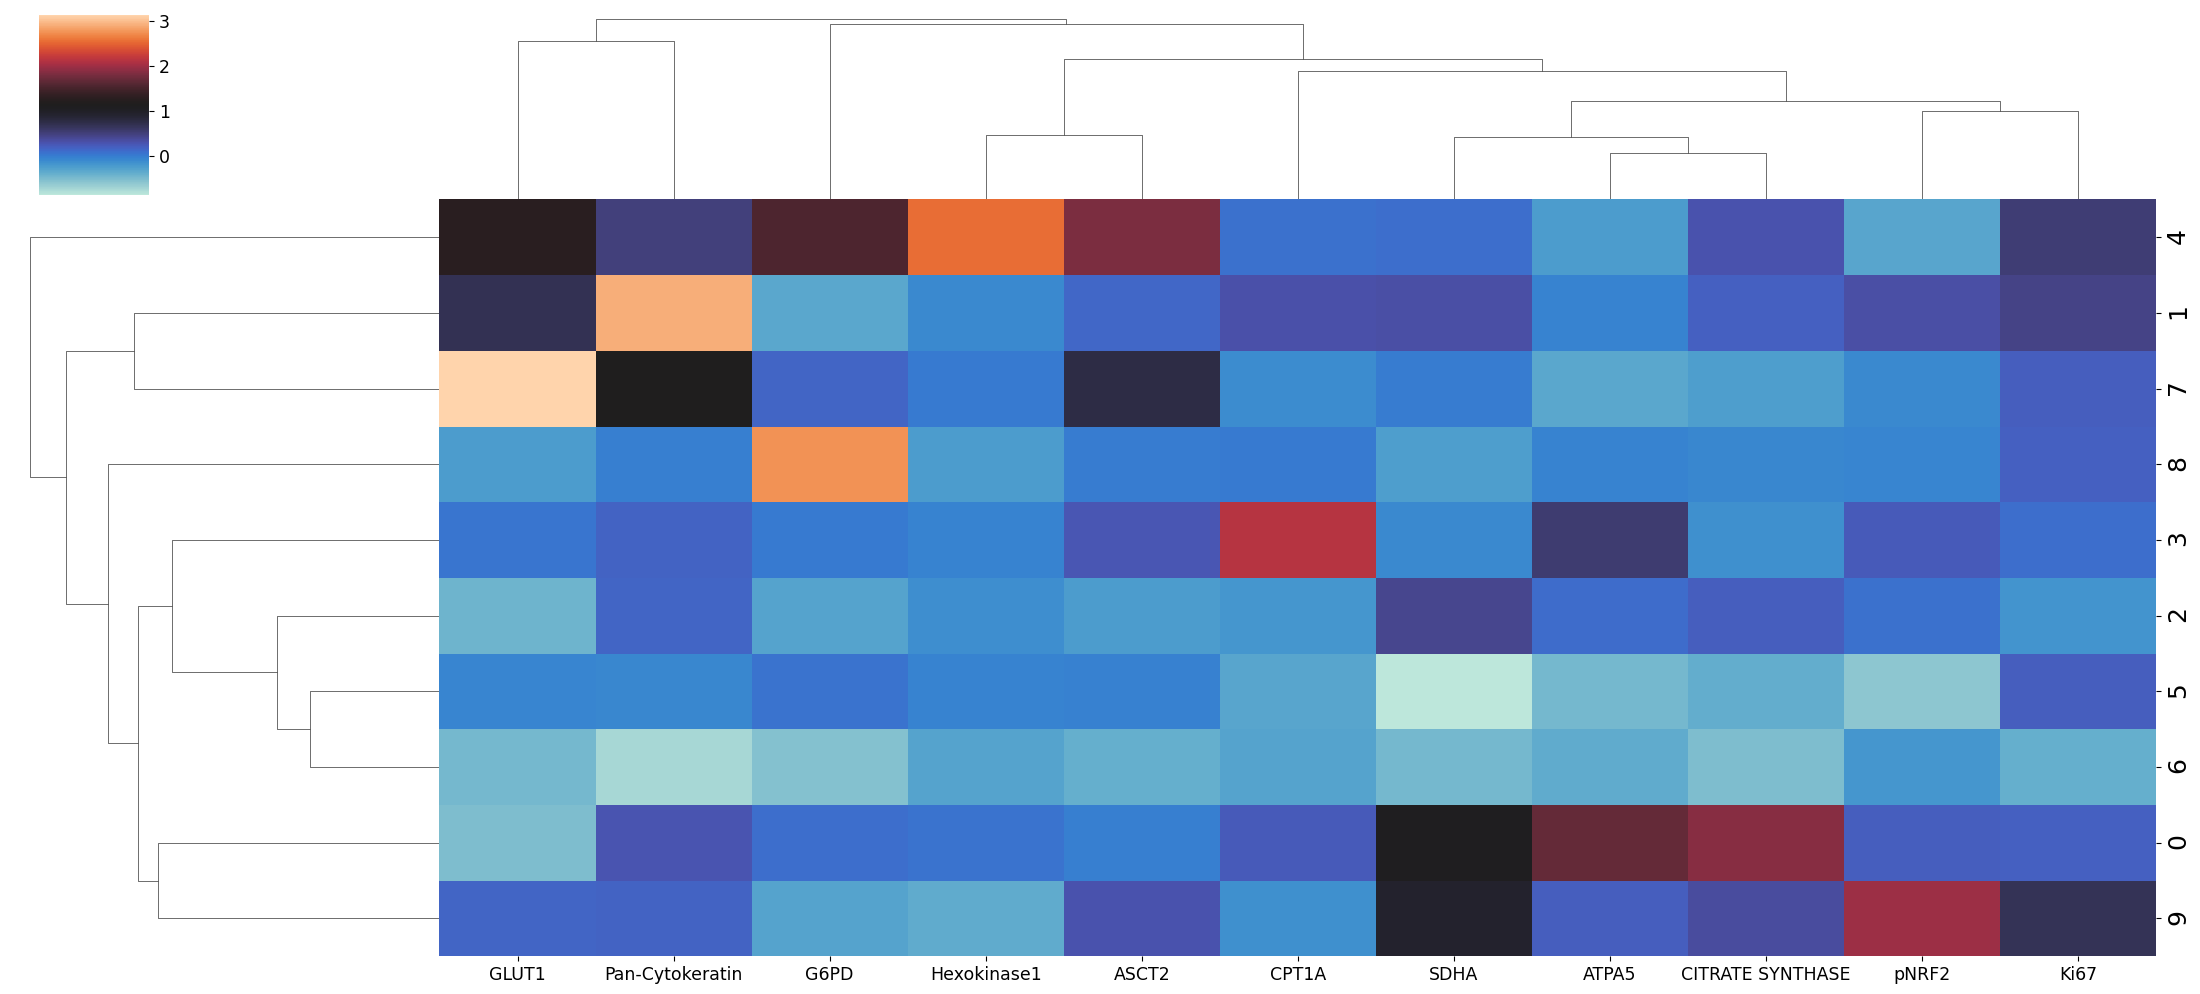

In [548]:
comb_df = pd.concat([cluster_composition, cluster_avg_exp], axis=1)

fg = sns.clustermap(cluster_avg_exp, cmap='icefire', figsize=(22,10),
                    row_cluster = True,
                    col_cluster=True,
                    xticklabels=True,
                    yticklabels=True)

fg.cax.yaxis.set_tick_params(labelsize=12.5)

fg.ax_heatmap.set_yticklabels(fg.ax_heatmap.get_yticklabels(), fontsize=18)
fg.ax_heatmap.set_xticklabels(fg.ax_heatmap.get_xticklabels(), fontsize=12.5)

#plt.savefig('../figures/tonsil/tonsil_protein_neighborhood_heatmap.png')
plt.savefig('metabolic_neighbourhood_heatmap.svg', dpi=300)
plt.show()

In [ ]:
set(adata.obs)

In [257]:
nbs = {'4':'Hypoxic_glutamineimport_PPP', 
       '1':'Hypoxic',
       '7': 'Hypoxic_glutamineimport', 
       '8':'Glutamineimport_PPP',
       '3': 'Lipid_oxidation', 
       '2': 'low', #? 
       '5': 'low', 
       '6': 'low', 
       '0': 'Oxphos', #maybe mitochondrial 
       '9': 'pNRFhiSDHAhi_CPTA1lo'}

In [258]:
protein['protein_exp_nb'] = protein['cluster_protein_order']

protein['protein_exp_nb'].replace(nbs, inplace=True)

/tmp/ipykernel_25087/1745932016.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  protein['protein_exp_nb'].replace(nbs, inplace=True)


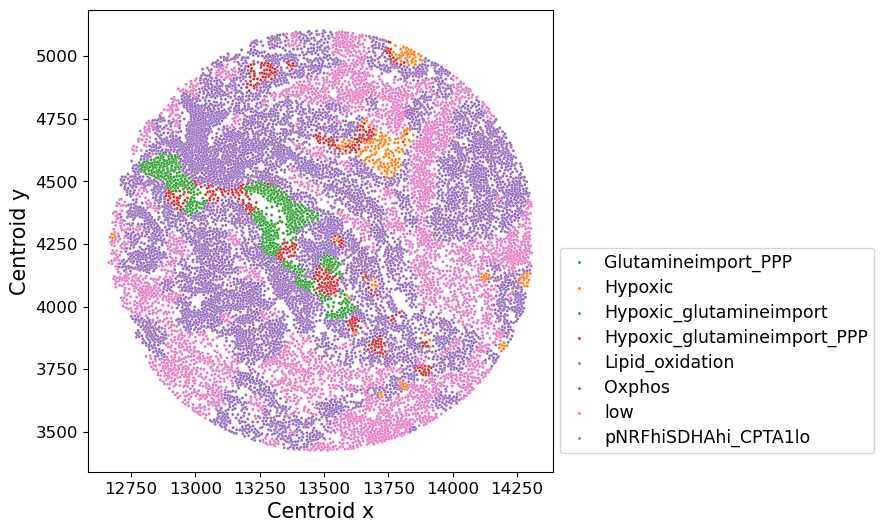

In [549]:
#core = 'TMA_B_E1'

plt.figure(figsize=(6, 6))
sns.scatterplot(data=adata.obs[adata.obs['unique_core']=='TMA_A_B6'], x="x", y="y", hue="protein_exp_nb",
                 s=5, rasterized=True, color = color_dict)#,
                #palette="bright")

plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.xlabel("Centroid x", fontsize=15)
plt.ylabel("Centroid y", fontsize=15)

legend = plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 0.5))
legend.get_title().set_fontsize('10')
for label in legend.get_texts():
    label.set_fontsize(12.5)

#plt.savefig('../figures/tonsil/tonsil_avgprotein_order.png')
#plt.savefig(f'./figures/protein_metabolic_nb_anno_TMA_A_A6.svg', dpi=300)
plt.show()

In [260]:
protein['protein_exp_nb'].value_counts()

protein_exp_nb
low                            850300
Oxphos                          76449
Glutamineimport_PPP             75480
pNRFhiSDHAhi_CPTA1lo            69618
Hypoxic                         59112
Hypoxic_glutamineimport         54850
Lipid_oxidation                 49247
Hypoxic_glutamineimport_PPP     47924
Name: count, dtype: int64

In [273]:
adata.obs = pd.merge(adata.obs, protein[['protein_exp_nb']], left_index=True, right_index=True, how = 'right')

In [276]:
adata.write_h5ad('adjTMA_metabolicnbs.h5ad')

In [362]:
adata = ad.read_h5ad('adjTMA_metabolicnbs.h5ad')

In [363]:
adata.X

array([[-1.30880203, -0.35781454, -0.51348294, ...,  3.00679688,
         0.86243318,  3.07754522],
       [-1.54113633, -0.56216099, -0.27679843, ...,  1.23335261,
         2.30797475,  1.11942476],
       [-0.83165828, -0.49726925,  0.20488906, ...,  3.1663941 ,
         2.26919545,  2.52560905],
       ...,
       [-0.73271536, -0.2633303 , -0.53963152, ..., -2.34806874,
         3.85764395, -2.63945599],
       [-1.72688125, -0.44859773, -0.79484588, ...,  0.67238823,
         1.50528676,  0.51759828],
       [-1.82029316,  0.29660559, -0.01155981, ..., -1.70792222,
        -3.51198199, -1.09941204]])

In [364]:
nbs = adata.obs

In [365]:
nbs

,Image,Object ID,Name,Class,TMA core,Parent,ROI,x,y,Nucleus: Area µm^2,...,CITRATE_SYNTHASE_pos,metabolic_state,glucose,glycolysis,nucleotide,fatty_acid,glutamine,oxidative_stress_resistance,CT_metabolic,protein_exp_nb
0,TMA_A,9bf3cb5d-7e99-4756-88f5-7afeb0da8f3c,PathCellObject,NaN,NaN,A8,Polygon,17684.6,941.97,83.4029,...,neg,Glycolysis_Nucleotide_Glutamine,glucose_neg,glycolysis_pos,nucleotide_pos,fatty_acid_neg,glutamine_pos,oxidative_stress_resistance_neg,CD4_cellsGlycolysis_Nucleotide_Glutamine,low
1,TMA_A,3742e448-afc9-4a07-af9f-520bd49a89de,PathCellObject,NaN,NaN,A8,Polygon,17570.2,952.30,57.9763,...,neg,Glycolysis_Nucleotide_Fatty_acid_Glutamine,glucose_neg,glycolysis_pos,nucleotide_pos,fatty_acid_pos,glutamine_pos,oxidative_stress_resistance_neg,TumourGlycolysis_Nucleotide_Fatty_acid_Glutamine,low
2,TMA_A,95b9f7dc-91b1-46a5-9a5e-507f9d64b25d,PathCellObject,NaN,NaN,A8,Polygon,17663.5,950.24,85.9344,...,neg,Glycolysis_Nucleotide_Glutamine,glucose_neg,glycolysis_pos,nucleotide_pos,fatty_acid_neg,glutamine_pos,oxidative_stress_resistance_neg,TumourGlycolysis_Nucleotide_Glutamine,low
3,TMA_A,fd5fea99-ac14-4774-a790-a1c2b8878caa,PathCellObject,NaN,NaN,A8,Polygon,17690.0,952.62,51.6167,...,neg,Glycolysis_Nucleotide_Glutamine,glucose_neg,glycolysis_pos,nucleotide_pos,fatty_acid_neg,glutamine_pos,oxidative_stress_resistance_neg,Other_Stromal_cellsGlycolysis_Nucleotide_Gluta...,low
4,TMA_A,50b87348-f46c-471c-b6d5-35153d0b5869,PathCellObject,NaN,NaN,A8,Polygon,17701.9,952.87,21.0185,...,neg,Glycolysis_Nucleotide_Glutamine,glucose_neg,glycolysis_pos,nucleotide_pos,fatty_acid_neg,glutamine_pos,oxidative_stress_resistance_neg,Other_Stromal_cellsGlycolysis_Nucleotide_Gluta...,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,TMA_B,435d2fcc-1f27-42bd-bfcb-29e735d5b020,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15794.7,25948.80,50.1242,...,neg,Nucleotide_Fatty_acid,glucose_neg,glycolysis_neg,nucleotide_pos,fatty_acid_pos,glutamine_neg,oxidative_stress_resistance_neg,FibroblastNucleotide_Fatty_acid,Glutamineimport_PPP
1282976,TMA_B,a0b7fb2e-c4e8-4d98-994d-3119f5d4c2f0,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15808.1,25947.60,41.6162,...,neg,Nucleotide,glucose_neg,glycolysis_neg,nucleotide_pos,fatty_acid_neg,glutamine_neg,oxidative_stress_resistance_neg,TumourNucleotide,Glutamineimport_PPP
1282977,TMA_B,78cdbe9b-97b3-4c79-b8dd-9a979eccd795,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15816.2,25947.90,21.2559,...,neg,Glycolysis_Nucleotide,glucose_neg,glycolysis_pos,nucleotide_pos,fatty_acid_neg,glutamine_neg,oxidative_stress_resistance_neg,TumourGlycolysis_Nucleotide,Glutamineimport_PPP
1282978,TMA_B,c82b5693-ab8c-49be-aa92-8d6e67c96e42,J-8 - PathCellObject,NaN,J-8,J8,Polygon,15825.7,25947.60,50.0005,...,neg,Nucleotide_Fatty_acid,glucose_neg,glycolysis_neg,nucleotide_pos,fatty_acid_pos,glutamine_neg,oxidative_stress_resistance_neg,CD8_cellsNucleotide_Fatty_acid,Glutamineimport_PPP


In [6]:
import pandas as pd
import anndata as ad 
import scanpy as sc

In [ ]:
adata = ad.read_h5ad('adjTMA_xbounds.h5ad') #

In [8]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'TMA core', 'Parent', 'ROI', 'x', 'y',
       'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'unique_core', 'patientID', 'adjtma_PCF_repA', 'adjtma_PCF_repB',
       'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode', 'Histology',
       'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery', 'StartDate',
       'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos', 'PAX5_pos',
       'FOXP3_pos', 'Ki67_pos', 'Gra

In [17]:
proportion_dfs = ['protein_exp_nb','CT_final', 'CT_basetumour', 'Metabolic_baseCT',
       'CT_metatumour_funcimmu', 'Metabolic_allcells']

prop_tumous = ['protein_exp_nb','CT_final']

In [12]:
obs = adata.obs 
tumour = obs[obs['CT_basetumour'].isin(['Tumour'])]


In [38]:
tumour = obs[obs['tregion'].isin(['Tumor'])]
Stroma = obs[obs['tregion'].isin(['Stroma'])]

In [37]:
obs['tregion'].value_counts()

tregion
Tumor     646072
Stroma    541439
Name: count, dtype: int64

In [39]:
props_dfs = {}

for proportion_df in proportion_dfs:
    props = pd.crosstab(index=tumour['unique_core'],
                        columns=tumour[proportion_df],
                        normalize="index")
    props.columns = [f"{proportion_df}_{col}" for col in props.columns]
    props_dfs[proportion_df] = props

combined_props_df = pd.concat(props_dfs.values(), axis=1)

combined_props_df.to_csv('tumourregion_proportion.csv')

In [35]:
props_dfs = {}

for proportion_df in proportion_dfs:
    props = pd.crosstab(index=Stroma['unique_core'],
                        columns=Stroma[proportion_df],
                        normalize="index")
    props.columns = [f"{proportion_df}_{col}" for col in props.columns]
    props_dfs[proportion_df] = props

combined_props_df = pd.concat(props_dfs.values(), axis=1)

combined_props_df.to_csv('Stromaregion_proportion.csv')

In [28]:
props_dfs_tumour = {}

for proportion_df in prop_tumous:
    props = pd.crosstab(index=tumour['unique_core'],
                        columns=tumour[proportion_df],
                        normalize="index")
    props.columns = [f"tumour_{proportion_df}_{col}" for col in props.columns]
    props_dfs_tumour[proportion_df] = props

combined_props_df_tumour = pd.concat(props_dfs_tumour.values(), axis=1)

In [31]:
obs


,Image,Object ID,Name,TMA core,Parent,ROI,x,y,Nucleus: Area µm^2,Nucleus: Length µm,...,Oxidative_Stress,Lipid_Oxidation,PPP,Glutamine_import,Phenotype,Metabolic_baseCT,CT_metatumour_funcimmu,Metabolic_allcells,meta,stage_grouped
43218,TMA_A,8eb9a0e4-2411-4795-ac16-f7618d6c2d75,A-1 - PathCellObject,A-1,A1,Polygon,2276.4,1257.7,18.8797,16.2778,...,False,False,True,False,PPP,TumourPPP,PPP,PPP,NaN,stage2
43219,TMA_A,e82556c2-c265-4e5a-8f00-c8bc6ba6984a,A-1 - PathCellObject,A-1,A1,Polygon,2254.4,1261.8,23.1361,18.8893,...,False,False,True,True,PPP_Glutamine_import,TumourPPP_Glutamine_import,PPP_Glutamine_import,PPP_Glutamine_import,NaN,stage2
43220,TMA_A,74ad0d8c-0cbb-4706-8ad8-09344d9d3587,A-1 - PathCellObject,A-1,A1,Polygon,2234.1,1265.9,39.7772,24.3426,...,False,False,True,False,PPP,TumourPPP,PPP,PPP,NaN,stage2
43221,TMA_A,af747316-a30d-49b3-8c95-281030cbbe87,A-1 - PathCellObject,A-1,A1,Polygon,2315.7,1273.0,67.2415,31.8443,...,False,False,True,False,PPP,CD4_cellsPPP,CD4_cells,PPP,NaN,stage2
43222,TMA_A,3634e16b-460a-41b8-8f9b-7ce175036e8b,A-1 - PathCellObject,A-1,A1,Polygon,2235.7,1276.6,64.2630,30.5931,...,False,False,False,False,Phenotype,TumourPhenotype,Tumour_metalow,Phenotype,low,stage2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,TMA_B,435d2fcc-1f27-42bd-bfcb-29e735d5b020,J-8 - PathCellObject,J-8,J8,Polygon,15794.7,25948.8,50.1242,30.8873,...,False,True,True,False,Lipid_Oxidation_PPP,FibroblastLipid_Oxidation_PPP,Fibroblast,Lipid_Oxidation_PPP,NaN,stage2
1282976,TMA_B,a0b7fb2e-c4e8-4d98-994d-3119f5d4c2f0,J-8 - PathCellObject,J-8,J8,Polygon,15808.1,25947.6,41.6162,24.7384,...,False,False,True,False,PPP,TumourPPP,PPP,PPP,NaN,stage2
1282977,TMA_B,78cdbe9b-97b3-4c79-b8dd-9a979eccd795,J-8 - PathCellObject,J-8,J8,Polygon,15816.2,25947.9,21.2559,17.8781,...,False,False,True,False,PPP,TumourPPP,PPP,PPP,NaN,stage2
1282978,TMA_B,c82b5693-ab8c-49be-aa92-8d6e67c96e42,J-8 - PathCellObject,J-8,J8,Polygon,15825.7,25947.6,50.0005,26.8269,...,False,True,True,False,Lipid_Oxidation_PPP,CD8_cellsLipid_Oxidation_PPP,CD8_cells,Lipid_Oxidation_PPP,NaN,stage2


In [29]:
combined_props_df_tumour

,tumour_protein_exp_nb_Glutamineimport_PPP,tumour_protein_exp_nb_Hypoxic,tumour_protein_exp_nb_Hypoxic_glutamineimport,tumour_protein_exp_nb_Hypoxic_glutamineimport_PPP,tumour_protein_exp_nb_Lipid_oxidation,tumour_protein_exp_nb_Oxphos,tumour_protein_exp_nb_low,tumour_protein_exp_nb_pNRFhiSDHAhi_CPTA1lo,tumour_CT_final_CD44+,tumour_CT_final_CD44+_PDL1+,...,tumour_CT_final_PDL1_MHC_I&II_CD44+,tumour_CT_final_PDL1_MHC_II,tumour_CT_final_PDL1_MHC_I_CD44+,tumour_CT_final_Proliferating,tumour_CT_final_Proliferating_CD44+,tumour_CT_final_Proliferating_MHC_I,tumour_CT_final_Proliferating_MHC_I&II,tumour_CT_final_Proliferating_MHC_II,tumour_CT_final_Proliferating_PDL1,tumour_CT_final_Tumour
unique_core,,,,,,,,,,,,,,,,,,,,,
TMA_A_A1,0.000000,0.000000,0.000000,0.00000,0.000000,0.930879,0.069121,0.000000,0.013546,0.000000,...,0.000000,0.000000,0.000000,0.001737,0.000000,0.000000,0.000000,0.001389,0.000000,0.376867
TMA_A_A2,0.000000,0.075897,0.051988,0.00000,0.183764,0.021129,0.128440,0.538782,0.053934,0.000000,...,0.000556,0.000000,0.000834,0.000556,0.001390,0.053656,0.001946,0.000278,0.000000,0.215457
TMA_A_A3,0.000000,0.000000,0.001133,0.00000,0.000000,0.000227,0.995016,0.003625,0.001133,0.000000,...,0.000453,0.026733,0.000000,0.005211,0.000227,0.000227,0.009289,0.085184,0.000000,0.081106
TMA_A_A4,0.320644,0.000000,0.000000,0.00000,0.000000,0.008785,0.670571,0.000000,0.000000,0.000000,...,0.002196,0.115666,0.000000,0.013909,0.000000,0.001464,0.007321,0.009517,0.001464,0.452416
TMA_A_A5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.008741,0.000000,...,0.016900,0.018648,0.001166,0.004079,0.001166,0.010490,0.029720,0.008741,0.000000,0.022145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMA_B_J2,0.005527,0.002409,0.038690,0.00000,0.033447,0.004960,0.266156,0.648810,0.016865,0.000283,...,0.000000,0.000000,0.000425,0.025227,0.000000,0.000000,0.000000,0.000000,0.000000,0.954649
TMA_B_J3,0.061814,0.000000,0.481361,0.00732,0.000136,0.000000,0.413176,0.036194,0.031449,0.011522,...,0.002982,0.002304,0.003389,0.124305,0.001491,0.003931,0.000542,0.000000,0.001898,0.784059
TMA_B_J4,0.008557,0.000000,0.000000,0.00000,0.005807,0.000000,0.985636,0.000000,0.003056,0.000306,...,0.000306,0.003667,0.001528,0.021699,0.000000,0.005807,0.001528,0.000000,0.053484,0.418093


In [25]:
combined_props_df

,protein_exp_nb_Glutamineimport_PPP,protein_exp_nb_Hypoxic,protein_exp_nb_Hypoxic_glutamineimport,protein_exp_nb_Hypoxic_glutamineimport_PPP,protein_exp_nb_Lipid_oxidation,protein_exp_nb_Oxphos,protein_exp_nb_low,protein_exp_nb_pNRFhiSDHAhi_CPTA1lo,CT_final_B_cells,CT_final_CD4_TFH,...,Metabolic_allcells_OxPhos_Lipid_Oxidation,Metabolic_allcells_OxPhos_Lipid_Oxidation_PPP,Metabolic_allcells_OxPhos_PPP,Metabolic_allcells_Oxidative_Stress,Metabolic_allcells_Oxidative_Stress_Glutamine_import,Metabolic_allcells_Oxidative_Stress_PPP,Metabolic_allcells_Oxidative_Stress_PPP_Glutamine_import,Metabolic_allcells_PPP,Metabolic_allcells_PPP_Glutamine_import,Metabolic_allcells_Phenotype
unique_core,,,,,,,,,,,,,,,,,,,,,
TMA_A_A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.837076,0.162924,0.000000,0.000212,0.000000,...,0.000000,0.000000,0.001907,0.000424,0.000000,0.000424,0.000000,0.137288,0.022669,0.806568
TMA_A_A2,0.000000,0.026611,0.020610,0.000000,0.072647,0.011055,0.572805,0.296273,0.058828,0.010897,...,0.000000,0.000000,0.000079,0.001579,0.001105,0.009160,0.004422,0.025584,0.043667,0.704359
TMA_A_A3,0.000000,0.000000,0.004026,0.000000,0.000000,0.000139,0.993475,0.002360,0.004581,0.006386,...,0.000000,0.000000,0.000139,0.000416,0.000555,0.001527,0.001111,0.060947,0.020131,0.860752
TMA_A_A4,0.068837,0.000000,0.000000,0.000000,0.000000,0.001310,0.929853,0.000000,0.002923,0.039609,...,0.000000,0.000000,0.002721,0.000806,0.000302,0.002117,0.001008,0.226063,0.051502,0.604818
TMA_A_A5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.125716,0.021844,...,0.000000,0.000000,0.000000,0.006874,0.001375,0.020087,0.002520,0.132743,0.094554,0.484686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMA_B_J2,0.003635,0.001545,0.035438,0.000000,0.027260,0.003907,0.461699,0.466515,0.000636,0.000000,...,0.000000,0.000000,0.000000,0.073694,0.005179,0.016811,0.000636,0.130759,0.015175,0.337483
TMA_B_J3,0.035730,0.000000,0.300698,0.004383,0.002674,0.000000,0.635938,0.020576,0.001560,0.000520,...,0.000223,0.000000,0.000074,0.005571,0.008171,0.000297,0.001486,0.086466,0.253231,0.108008
TMA_B_J4,0.003550,0.000000,0.000000,0.000000,0.003395,0.000000,0.993055,0.000000,0.002006,0.000231,...,0.000000,0.000000,0.000000,0.000463,0.000154,0.000617,0.000231,0.263369,0.072536,0.066286


In [20]:
combined_props_df.to_csv('./Feature_csv/all_cells_proportions.csv')

In [30]:
combined_props_df_tumour.to_csv('./Feature_csv/tumour_proportions.csv')

In [410]:
prop_nolow = nbs
prop_nolow = prop_nolow[~prop_nolow['protein_exp_nb'].isin(['low'])]
prop_nolow= pd.crosstab(index=prop_nolow['unique_core'],
                                    columns=prop_nolow['protein_exp_nb'],
                                    normalize="index")

In [644]:
tumour_proportions = adata.obs[adata.obs['CT_basetumour'] =='Tumour']

In [646]:
tumour_proportions_df= pd.crosstab(index=tumour_proportions['unique_core'],
                                    columns=tumour_proportions['protein_exp_nb'],
                                    normalize="index")

In [648]:
tumour_proportions_df.reset_index(inplace = True)

In [649]:
tumour_proportions_df

protein_exp_nb,unique_core,Glutamineimport_PPP,Hypoxic,Hypoxic_glutamineimport,Hypoxic_glutamineimport_PPP,Lipid_oxidation,Oxphos,low,pNRFhiSDHAhi_CPTA1lo
0,TMA_A_A1,0.000000,0.020880,0.000000,0.00000,0.000000,0.888920,0.090200,0.000000
1,TMA_A_A2,0.000000,0.075897,0.051988,0.00000,0.183764,0.021129,0.128440,0.538782
2,TMA_A_A3,0.000000,0.000000,0.001133,0.00000,0.000000,0.000227,0.995016,0.003625
3,TMA_A_A4,0.320644,0.000000,0.000000,0.00000,0.000000,0.008785,0.670571,0.000000
4,TMA_A_A5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
114,TMA_B_J2,0.005527,0.002409,0.038690,0.00000,0.033447,0.004960,0.266156,0.648810
115,TMA_B_J3,0.061814,0.000000,0.481361,0.00732,0.000136,0.000000,0.413176,0.036194
116,TMA_B_J4,0.008557,0.000000,0.000000,0.00000,0.005807,0.000000,0.985636,0.000000
117,TMA_B_J7,0.000162,0.000000,0.000000,0.00000,0.225921,0.001293,0.772301,0.000323


In [653]:
adata.obs['stage'].value_counts()

stage
IIB     656418
IIIA    291620
IB      130017
IIA      90392
IIIB     63740
IA3      27705
1A3      23088
Name: count, dtype: int64

In [ ]:
proportion_df = pd.merge(proportion_df, df1_unique[['unique_core', 'Histology', 'Relapse','Relapse_followup', 'stage']], on='unique_core', how='left')

In [371]:
proportion_df = pd.crosstab(index=adata.obs['unique_core'],
                                    columns=adata.obs['protein_exp_nb'],
                                    normalize="index")
proportion_df.reset_index(inplace=True)
        
        # Create counts dataframe
counts_df = pd.crosstab(index=adata.obs['unique_core'],
                                columns=adata.obs['protein_exp_nb'],
                                normalize=False)
counts_df.reset_index(inplace=True)
        
        # Add patient metadata to both dataframes
        #for data in patient_data:
        #    proportion_df[data] = proportion_df[samples].map(patient_data[data]).astype('category')
        #    counts_df[data] = counts_df[samples].map(patient_data[data]).astype('category')
        
        # Store dataframes in dictionaries
        #counts_dict[f'{phenotype}_counts'] = counts_df
        #proportion_dict[f'{phenotype}_proportion'] = proportion_df

In [429]:
df1_unique = adata.obs.drop_duplicates(subset='unique_core', keep='first')

# Merge df1_unique (only unique patients) with df2 on the 'patient' column
proportion_df = pd.crosstab(index=adata.obs['unique_core'],
                                    columns=adata.obs['protein_exp_nb'],
                                    normalize="index")

proportion_df = pd.merge(proportion_df, df1_unique[['unique_core', 'Histology', 'Relapse','Relapse_followup']], on='unique_core', how='left')


# View the resulting dataframe
print(proportion_df)

    unique_core  Glutamineimport_PPP   Hypoxic  Hypoxic_glutamineimport  \
0      TMA_A_A1             0.000000  0.017027                 0.000000   
1      TMA_A_A2             0.000000  0.026611                 0.020610   
2      TMA_A_A3             0.000000  0.000000                 0.004026   
3      TMA_A_A4             0.068837  0.000000                 0.000000   
4      TMA_A_A5             0.000000  0.000000                 0.000000   
..          ...                  ...       ...                      ...   
114    TMA_B_J2             0.003635  0.001545                 0.035438   
115    TMA_B_J3             0.035730  0.000000                 0.300698   
116    TMA_B_J4             0.003550  0.000000                 0.000000   
117    TMA_B_J7             0.000878  0.000000                 0.000000   
118    TMA_B_J8             0.685696  0.000000                 0.000000   

     Hypoxic_glutamineimport_PPP  Lipid_oxidation    Oxphos       low  \
0                       0.

In [373]:
proportion_df = pd.merge(proportion_df, df1_unique[['unique_core', 'Histology', 'Relapse','Relapse_followup']], on='unique_core', how='left')
proportion_df

,unique_core,Glutamineimport_PPP,Hypoxic,Hypoxic_glutamineimport,Hypoxic_glutamineimport_PPP,Lipid_oxidation,Oxphos,low,pNRFhiSDHAhi_CPTA1lo,Histology,Relapse,Relapse_followup
0,TMA_A_A1,0.000000,0.017027,0.000000,0.000000,0.000000,0.789886,0.193087,0.000000,Adenocarcinoma,No,1968
1,TMA_A_A2,0.000000,0.026611,0.020610,0.000000,0.072647,0.011055,0.572805,0.296273,Squamous,Yes,234
2,TMA_A_A3,0.000000,0.000000,0.004026,0.000000,0.000000,0.000139,0.993475,0.002360,Adenocarcinoma,Yes,233
3,TMA_A_A4,0.068837,0.000000,0.000000,0.000000,0.000000,0.001310,0.929853,0.000000,Adenocarcinoma,No,1204
4,TMA_A_A5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,Squamous,Yes,907
...,...,...,...,...,...,...,...,...,...,...,...,...
114,TMA_B_J2,0.003635,0.001545,0.035438,0.000000,0.027260,0.003907,0.461699,0.466515,Adenocarcinoma,Yes,2262
115,TMA_B_J3,0.035730,0.000000,0.300698,0.004383,0.002674,0.000000,0.635938,0.020576,Adenocarcinoma,No,995
116,TMA_B_J4,0.003550,0.000000,0.000000,0.000000,0.003395,0.000000,0.993055,0.000000,Adenocarcinoma,Yes,214
117,TMA_B_J7,0.000878,0.000000,0.000000,0.000000,0.095578,0.000439,0.902941,0.000165,Adenocarcinoma,No,2558


<Figure size 3600x900 with 0 Axes>

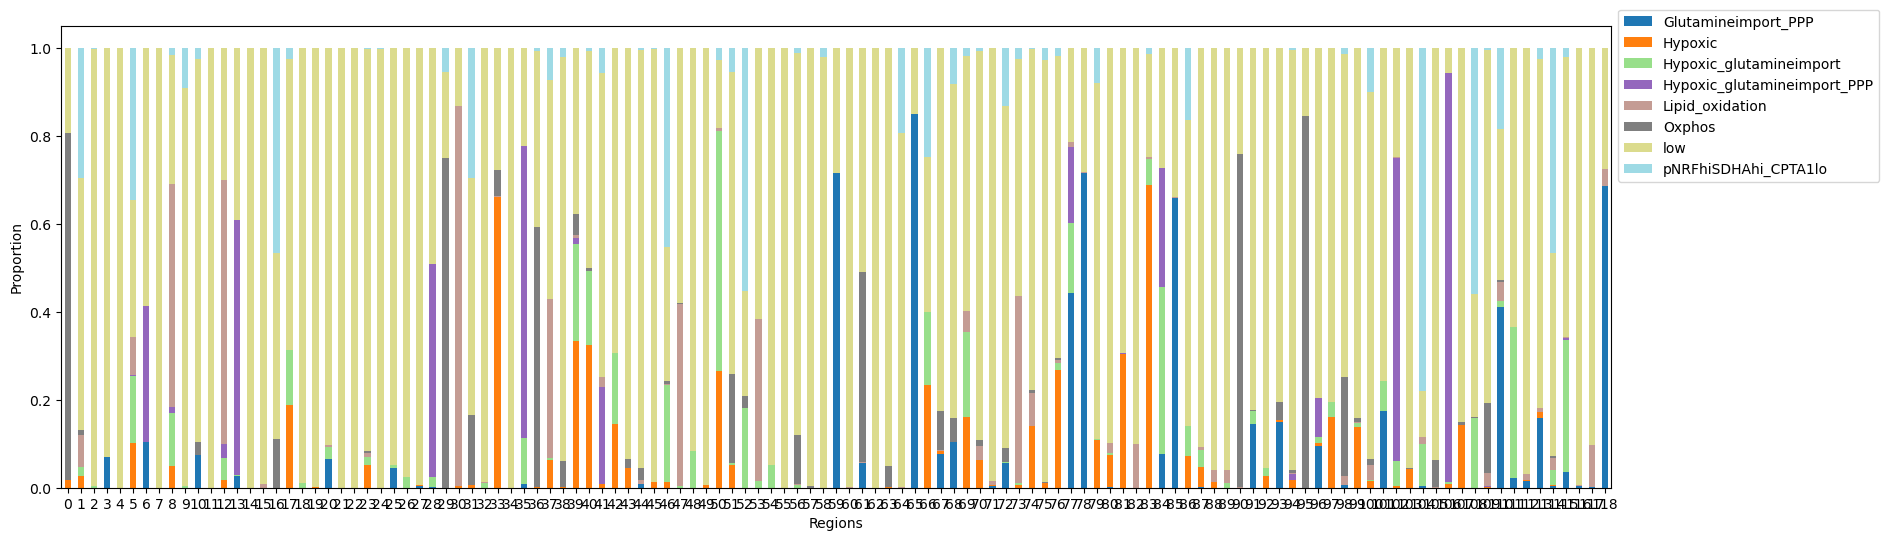

In [374]:
plt.figure(figsize=(12, 3), dpi = 300)

proportion_df.plot(kind='bar', 
                    stacked=True, 
                 
                    figsize=(20, 6),cmap="tab20", )

plt.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 1.05))

plt.xlabel("Regions")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
#plt.savefig("box_plot_whole_slide_NE_cellProportion.svg", dpi=300, bbox_inches="tight")


plt.show()

<Figure size 3600x900 with 0 Axes>

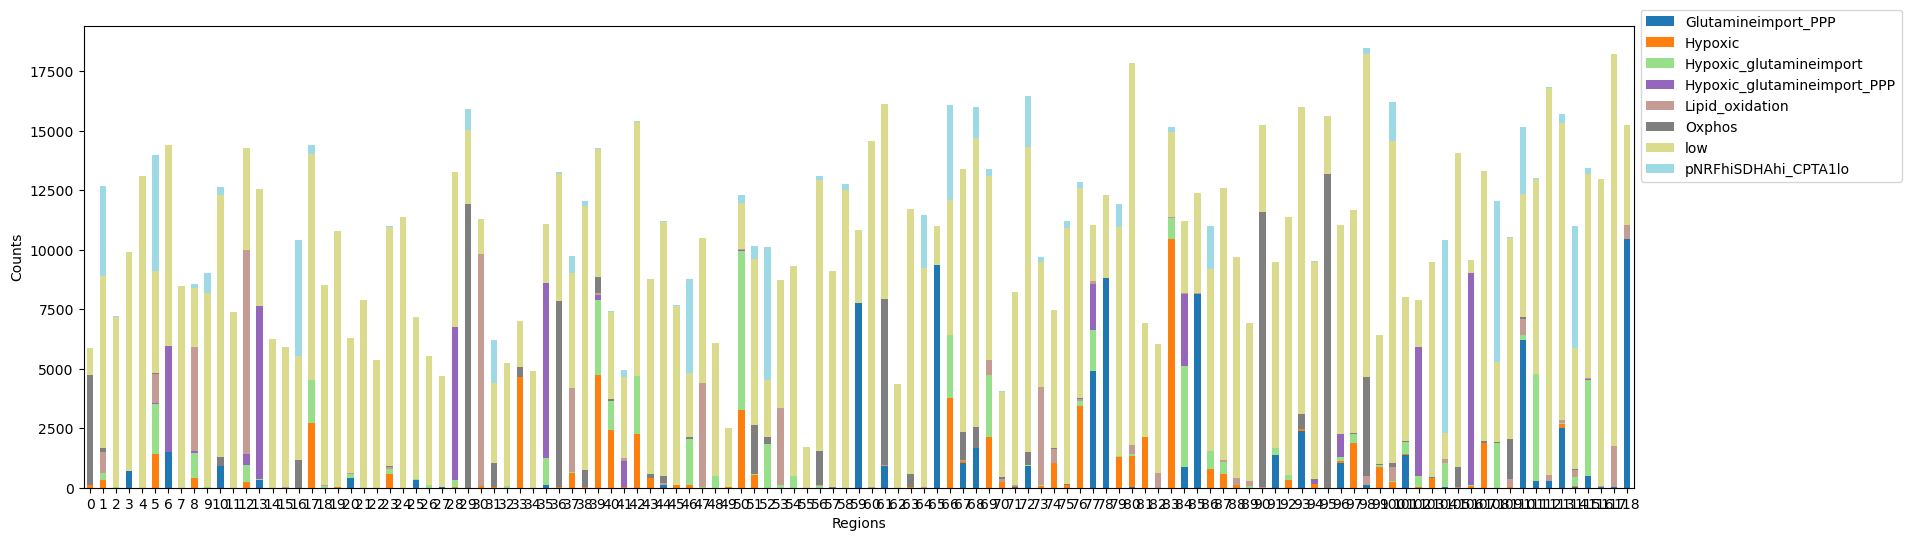

In [376]:
plt.figure(figsize=(12, 3), dpi = 300)

counts_df.plot(kind='bar', 
                    stacked=True, 
                 
                    figsize=(20, 6),cmap="tab20", )

plt.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 1.05))

plt.xlabel("Regions")
plt.ylabel("Counts")
plt.xticks(rotation=0)
#plt.savefig("box_plot_whole_slide_NE_cellProportion.svg", dpi=300, bbox_inches="tight")


plt.show()

In [ ]:
prop --> z score transform (RAf) 
Robust Z scoring 

In [377]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'Class', 'TMA core', 'Parent', 'ROI', 'x',
       'y', 'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'tumour_metatypes', 'unique_core', 'patientID', 'adjtma_PCF_repA',
       'adjtma_PCF_repB', 'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode',
       'Histology', 'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery',
       'StartDate', 'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos',
       'Granzyme B_

In [380]:
proportion_df.columns

Index(['unique_core', 'Glutamineimport_PPP', 'Hypoxic',
       'Hypoxic_glutamineimport', 'Hypoxic_glutamineimport_PPP',
       'Lipid_oxidation', 'Oxphos', 'low', 'pNRFhiSDHAhi_CPTA1lo', 'Histology',
       'Relapse', 'Relapse_followup'],
      dtype='object')

In [483]:
adata.obs['nb_immune_meta'] = adata.obs['protein_exp_nb'].astype('str')+ adata.obs['CT_basetumour'].astype('str')

In [498]:
adata.obs.columns

Index(['Image', 'Object ID', 'Name', 'Class', 'TMA core', 'Parent', 'ROI', 'x',
       'y', 'Nucleus: Area µm^2', 'Nucleus: Length µm', 'Nucleus: Circularity',
       'Nucleus: Solidity', 'tumour_nontumour', 'immunecelltypes', 'CD4_type',
       'CD8_type', 'mac_type', 'Tumour_type', 'Tumour_type_tidy',
       'tumour_metatypes', 'unique_core', 'patientID', 'adjtma_PCF_repA',
       'adjtma_PCF_repB', 'dict', 'DSP_WTA_ROI', 'TNM', 'stage', 'PathwayCode',
       'Histology', 'Sex', 'Smoking', 'EndCycle', 'DOB', 'Date of surgery',
       'StartDate', 'Deceased', 'DateDeceased', 'Relapse', 'Date of relapse',
       'Molecular profile', 'Mutation', 'Last known contact', 'Surv_status',
       'Surv_Followup', 'Relapse_status', 'Relapse_followup', 'tregion',
       'tumourdist', 'Tumour_area', 'Tumour_pc', 'Stroma_area', 'Stroma_pc',
       'CT_final', 'CT_basetumour', 'base_celltypes', 'batch', 'PD-L1_pos',
       'PD-1_pos', 'HLA-DR_pos', 'HLA-A_pos', 'ICOS(CD278)_pos',
       'Granzyme B_

In [503]:
nb_comp_patient_id = pd.crosstab(index=adata.obs['patientID'],
                                    columns=adata.obs['nb_immune_meta'],
                                    normalize="index")

In [504]:
nb_comp_patient_id

nb_immune_meta,Glutamineimport_PPPB_cells,Glutamineimport_PPPCD4_TFH,Glutamineimport_PPPCD4_cells,Glutamineimport_PPPCD8_cells,Glutamineimport_PPPCytotoxic_CD8_cells,Glutamineimport_PPPFibroblast,Glutamineimport_PPPMacrophages,Glutamineimport_PPPMacrophages_M2,Glutamineimport_PPPMacrophages_M2_PDL1+,Glutamineimport_PPPMacrophages_PDL1+,...,pNRFhiSDHAhi_CPTA1loCytotoxic_CD8_cells,pNRFhiSDHAhi_CPTA1loFibroblast,pNRFhiSDHAhi_CPTA1loMacrophages,pNRFhiSDHAhi_CPTA1loMacrophages_M2,pNRFhiSDHAhi_CPTA1loMacrophages_M2_PDL1+,pNRFhiSDHAhi_CPTA1loMacrophages_PDL1+,pNRFhiSDHAhi_CPTA1loOther_Stromal_cells,pNRFhiSDHAhi_CPTA1loPD1+_CD8_cells,pNRFhiSDHAhi_CPTA1loTumour,pNRFhiSDHAhi_CPTA1loVessels
patientID,,,,,,,,,,,,,,,,,,,,,
B06,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
B07,0.000000,0.0,0.000000,0.000099,0.0,0.000000,0.000297,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
B08,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000508,0.000000,0.000000,0.000000,0.000000,0.000508,0.0,0.027656,0.000000
B09,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
B10,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B79,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
B81,0.000038,0.0,0.002370,0.002905,0.0,0.009671,0.004472,0.000268,0.000000,0.000000,...,0.0,0.013264,0.004778,0.000535,0.000000,0.000000,0.006422,0.0,0.271386,0.001949
B82,0.000062,0.0,0.000185,0.000000,0.0,0.000308,0.071075,0.000493,0.000031,0.001508,...,0.0,0.004987,0.005264,0.000554,0.000185,0.000708,0.004556,0.0,0.085450,0.000185


In [505]:
nb_comp_patient_id = pd.merge(nb_comp_patient_id, df1_unique[['patientID', 'Histology', 'Relapse','Relapse_followup']], on='patientID', how='left')
nb_comp_patient_id

,patientID,Glutamineimport_PPPB_cells,Glutamineimport_PPPCD4_TFH,Glutamineimport_PPPCD4_cells,Glutamineimport_PPPCD8_cells,Glutamineimport_PPPCytotoxic_CD8_cells,Glutamineimport_PPPFibroblast,Glutamineimport_PPPMacrophages,Glutamineimport_PPPMacrophages_M2,Glutamineimport_PPPMacrophages_M2_PDL1+,...,pNRFhiSDHAhi_CPTA1loMacrophages_M2,pNRFhiSDHAhi_CPTA1loMacrophages_M2_PDL1+,pNRFhiSDHAhi_CPTA1loMacrophages_PDL1+,pNRFhiSDHAhi_CPTA1loOther_Stromal_cells,pNRFhiSDHAhi_CPTA1loPD1+_CD8_cells,pNRFhiSDHAhi_CPTA1loTumour,pNRFhiSDHAhi_CPTA1loVessels,Histology,Relapse,Relapse_followup
0,B06,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,Adenocarcinoma,No,583
1,B06,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,Adenocarcinoma,No,583
2,B07,0.000000,0.0,0.000000,0.000099,0.0,0.000000,0.000297,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,Adenocarcinoma,No,631
3,B07,0.000000,0.0,0.000000,0.000099,0.0,0.000000,0.000297,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,Adenocarcinoma,No,631
4,B08,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000508,0.0,0.027656,0.000000,Squamous,No,654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,B82,0.000062,0.0,0.000185,0.000000,0.0,0.000308,0.071075,0.000493,0.000031,...,0.000554,0.000185,0.000708,0.004556,0.0,0.085450,0.000185,Adenocarcinoma,Yes,800
115,B82,0.000062,0.0,0.000185,0.000000,0.0,0.000308,0.071075,0.000493,0.000031,...,0.000554,0.000185,0.000708,0.004556,0.0,0.085450,0.000185,Adenocarcinoma,Yes,800
116,B83,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000107,0.000000,0.000000,0.001463,0.0,0.011385,0.000999,Squamous,No,3110
117,B83,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000107,0.000000,0.000000,0.001463,0.0,0.011385,0.000999,Squamous,No,3110


In [506]:
nb_comp_patient_id=nb_comp_patient_id.drop_duplicates()

In [512]:
nb_comp_patient = pd.crosstab(index=adata.obs['CT_basetumour'],
                                    columns=adata.obs['protein_exp_nb'],
                                    normalize=False)

In [493]:
nb_comp_patient = pd.merge(nb_comp_patient, df1_unique[['unique_core', 'Histology', 'Relapse','Relapse_followup']], on='unique_core', how='left')
nb_comp_patient

,unique_core,Glutamineimport_PPPB_cells,Glutamineimport_PPPCD4_TFH,Glutamineimport_PPPCD4_cells,Glutamineimport_PPPCD8_cells,Glutamineimport_PPPCytotoxic_CD8_cells,Glutamineimport_PPPFibroblast,Glutamineimport_PPPMacrophages,Glutamineimport_PPPMacrophages_M2,Glutamineimport_PPPMacrophages_M2_PDL1+,...,pNRFhiSDHAhi_CPTA1loMacrophages_M2,pNRFhiSDHAhi_CPTA1loMacrophages_M2_PDL1+,pNRFhiSDHAhi_CPTA1loMacrophages_PDL1+,pNRFhiSDHAhi_CPTA1loOther_Stromal_cells,pNRFhiSDHAhi_CPTA1loPD1+_CD8_cells,pNRFhiSDHAhi_CPTA1loTumour,pNRFhiSDHAhi_CPTA1loVessels,Histology,Relapse,Relapse_followup
0,TMA_A_A1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Adenocarcinoma,No,1968
1,TMA_A_A2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003001,0.0,0.0,0.038219,0.010897,0.153032,0.016740,Squamous,Yes,234
2,TMA_A_A3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.002221,0.000000,Adenocarcinoma,Yes,233
3,TMA_A_A4,0.000000,0.000403,0.010079,0.000504,0.000000,0.007458,0.000302,0.000504,0.000806,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Adenocarcinoma,No,1204
4,TMA_A_A5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Squamous,Yes,907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,TMA_B_J2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000727,0.0,0.0,0.009995,0.000000,0.415993,0.000909,Adenocarcinoma,Yes,2262
115,TMA_B_J3,0.000074,0.000000,0.000000,0.000594,0.000074,0.000371,0.000297,0.000074,0.000000,...,0.000149,0.0,0.0,0.000000,0.000000,0.019834,0.000000,Adenocarcinoma,No,995
116,TMA_B_J4,0.000000,0.000000,0.000000,0.000617,0.000000,0.000154,0.000154,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,Adenocarcinoma,Yes,214
117,TMA_B_J7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000713,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000110,0.000000,Adenocarcinoma,No,2558


In [513]:
nb_comp_patient

protein_exp_nb,Glutamineimport_PPP,Hypoxic,Hypoxic_glutamineimport,Hypoxic_glutamineimport_PPP,Lipid_oxidation,Oxphos,low,pNRFhiSDHAhi_CPTA1lo
CT_basetumour,,,,,,,,
B_cells,115,44,29,24,138,121,31509,177
CD4_TFH,57,52,36,85,92,69,5479,123
CD4_cells,1557,430,317,383,1269,1924,98983,1166
CD8_cells,1519,794,803,984,1393,1596,60363,2085
Cytotoxic_CD8_cells,13,145,104,85,17,26,3130,105
Fibroblast,3548,1477,1636,1559,4044,2136,93223,4093
Macrophages,5518,1388,2094,1229,1882,3668,97313,2258
Macrophages_M2,541,292,247,565,599,1146,32647,344
Macrophages_M2_PDL1+,73,103,173,278,94,66,8770,269


In [522]:
cell_names = list(set(adata.obs['protein_exp_nb']))

In [523]:
from matplotlib import colors as mcolors
from matplotlib import colormaps

tab10 = colormaps['tab10']
tab20b = colormaps['tab20b']
tab20c = colormaps['tab20c']

# Extract specific colors by indexing into the colormap (values from 0 to 1)
# From tab20b: indices 8 to 19
colors_from_tab20b = [tab20b(i) for i in range(8, 20)] + [tab20b(0),tab20b(4),tab20b(3)]
# From tab20c: indices 0-3, 8-11, and 16-19
colors_from_tab20c = [tab20c(i) for i in range(4)] + [tab20c(i) for i in range(8, 12)] + [tab20c(i) for i in range(16, 20)]


# Combine the colors into a custom palette
custom_palette = colors_from_tab20c + colors_from_tab20b

colors_hex = [mcolors.rgb2hex(color) for color in custom_palette]
color_dict = dict(zip(cell_names, colors_hex))
color_dict['Glutamineimport_PPP'] = '#5F4BB6'
color_dict['Hypoxic'] = '#09BC8A'
color_dict['Hypoxic_glutamineimport']= '#CAFF8A'
color_dict['Hypoxic_glutamineimport_PPP'] = '#D6EFFF'
color_dict['Lipid_oxidation'] = '#846C5B'
color_dict['Oxphos'] = '#CE84AD'
color_dict['low'] = '#FED18C'
color_dict['pNRFhiSDHAhi_CPTA1lo'] = '#FE654F'

In [525]:
color_dict

{'Hypoxic_glutamineimport_PPP': '#D6EFFF',
 'Glutamineimport_PPP': '#5F4BB6',
 'low': '#FED18C',
 'Lipid_oxidation': '#846C5B',
 'pNRFhiSDHAhi_CPTA1lo': '#FE654F',
 'Hypoxic': '#09BC8A',
 'Oxphos': '#CE84AD',
 'Hypoxic_glutamineimport': '#CAFF8A'}

In [590]:
filtered = adata.obs
filtered = filtered[~filtered['unique_core'].isin(['TMA_A_G4'])]

In [601]:
set(filtered['unique_core'])

{'TMA_A_A1',
 'TMA_A_A2',
 'TMA_A_A3',
 'TMA_A_A4',
 'TMA_A_A5',
 'TMA_A_A6',
 'TMA_A_A7',
 'TMA_A_A8',
 'TMA_A_B2',
 'TMA_A_B3',
 'TMA_A_B4',
 'TMA_A_B5',
 'TMA_A_B6',
 'TMA_A_B7',
 'TMA_A_B8',
 'TMA_A_C1',
 'TMA_A_C2',
 'TMA_A_C3',
 'TMA_A_C4',
 'TMA_A_C5',
 'TMA_A_C6',
 'TMA_A_C7',
 'TMA_A_C8',
 'TMA_A_D1',
 'TMA_A_D5',
 'TMA_A_D6',
 'TMA_A_D7',
 'TMA_A_D8',
 'TMA_A_E1',
 'TMA_A_E3',
 'TMA_A_E4',
 'TMA_A_E5',
 'TMA_A_E6',
 'TMA_A_E7',
 'TMA_A_E8',
 'TMA_A_F1',
 'TMA_A_F3',
 'TMA_A_F4',
 'TMA_A_F5',
 'TMA_A_F6',
 'TMA_A_F7',
 'TMA_A_F8',
 'TMA_A_G1',
 'TMA_A_G2',
 'TMA_A_G3',
 'TMA_A_G5',
 'TMA_A_G6',
 'TMA_A_G7',
 'TMA_A_G8',
 'TMA_A_H1',
 'TMA_A_H2',
 'TMA_A_H5',
 'TMA_A_H6',
 'TMA_A_H7',
 'TMA_A_H8',
 'TMA_A_I2',
 'TMA_A_I3',
 'TMA_A_I4',
 'TMA_A_I5',
 'TMA_A_I6',
 'TMA_A_I7',
 'TMA_A_I8',
 'TMA_A_J2',
 'TMA_A_J4',
 'TMA_A_J5',
 'TMA_A_J6',
 'TMA_A_J7',
 'TMA_B_A1',
 'TMA_B_A2',
 'TMA_B_A6',
 'TMA_B_A8',
 'TMA_B_B1',
 'TMA_B_B2',
 'TMA_B_B6',
 'TMA_B_B8',
 'TMA_B_C1',
 'TMA_B_C2',

In [602]:
nb_comp_patient = pd.crosstab(index=filtered['CT_basetumour'],
                                    columns=filtered['protein_exp_nb'],
                                    normalize=False)

In [603]:
nb_comp_patient

protein_exp_nb,Glutamineimport_PPP,Hypoxic,Hypoxic_glutamineimport,Hypoxic_glutamineimport_PPP,Lipid_oxidation,Oxphos,low,pNRFhiSDHAhi_CPTA1lo
CT_basetumour,,,,,,,,
B_cells,115,44,29,24,138,121,31508,177
CD4_TFH,57,52,36,85,92,69,5466,122
CD4_cells,1557,430,317,383,1269,1924,98931,1166
CD8_cells,1519,792,803,984,1393,1596,60238,2085
Cytotoxic_CD8_cells,13,145,104,85,17,26,3107,105
Fibroblast,3548,1476,1636,1559,4044,2136,93186,4093
Macrophages,5518,1368,2094,1229,1882,3668,90809,2257
Macrophages_M2,541,291,247,565,599,1146,32527,344
Macrophages_M2_PDL1+,73,103,173,278,94,66,8715,267


<Figure size 7500x3000 with 0 Axes>

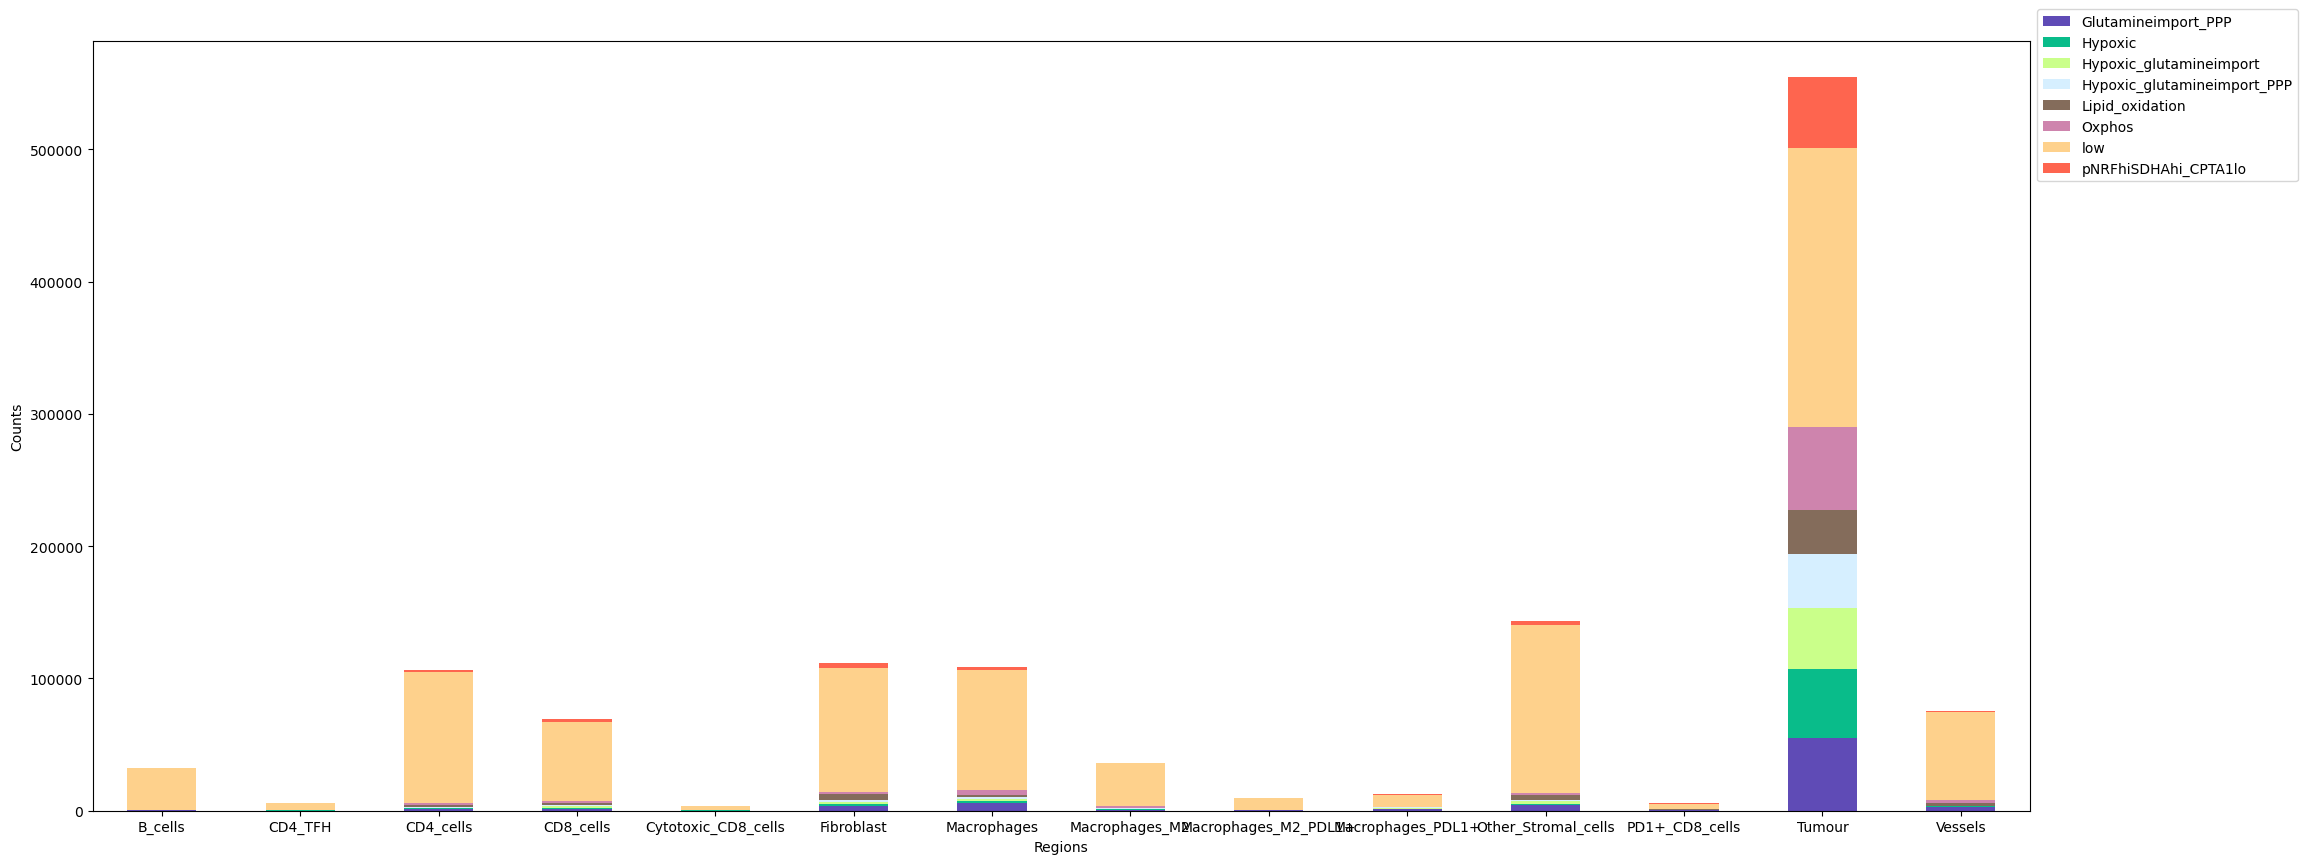

In [604]:
plt.figure(figsize=(25, 10), dpi = 300)

nb_comp_patient.plot(kind='bar', 
                    stacked=True, 
                 
                figsize=(25, 10), color=color_dict )

plt.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 1.05))

plt.xlabel("Regions")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.savefig("metabolic_celltypes.svg", dpi=300, bbox_inches="tight")


plt.show()

In [494]:
nb_comp_patient.to_csv('nb_comp_patient.csv')

In [507]:
nb_comp_patient_id.to_csv('nb_comp_patient_id.csv')

In [466]:
nb_comp = pd.crosstab(index=adata.obs['CT_basetumour'],
                                    columns=adata.obs['protein_exp_nb'],
                                    normalize="index")

In [467]:
nb_comp

protein_exp_nb,Glutamineimport_PPP,Hypoxic,Hypoxic_glutamineimport,Hypoxic_glutamineimport_PPP,Lipid_oxidation,Oxphos,low,pNRFhiSDHAhi_CPTA1lo
CT_basetumour,,,,,,,,
B_cells,0.003576,0.001368,0.000902,0.000746,0.004291,0.003763,0.979849,0.005504
CD4_TFH,0.009511,0.008677,0.006007,0.014183,0.015351,0.011513,0.914233,0.020524
CD4_cells,0.014685,0.004055,0.002990,0.003612,0.011968,0.018146,0.933546,0.010997
CD8_cells,0.021844,0.011418,0.011548,0.014151,0.020033,0.022952,0.868070,0.029984
Cytotoxic_CD8_cells,0.003586,0.040000,0.028690,0.023448,0.004690,0.007172,0.863448,0.028966
Fibroblast,0.031759,0.013221,0.014644,0.013955,0.036199,0.019120,0.834464,0.036638
Macrophages,0.047837,0.012033,0.018153,0.010655,0.016316,0.031799,0.843632,0.019575
Macrophages_M2,0.014870,0.008026,0.006789,0.015530,0.016465,0.031500,0.897364,0.009455
Macrophages_M2_PDL1+,0.007429,0.010482,0.017606,0.028292,0.009566,0.006717,0.892530,0.027376


In [479]:
protein

,DAPI,CD45RO,HLA-A,CD4,E-cadherin,CD20,CD68,CD8,cd14,CD11c,...,CT_final,unique_core,cluster_composition,cluster_protein,cluster_protein_order,all_protein,composition,Image,x_adjusted,protein_exp_nb
0,-1.308802,-0.357815,-0.513483,-0.338048,-0.362074,0.847417,0.011089,0.585918,-0.059421,-0.270168,...,CD4_cells,TMA_A_A8,1,0,5,"[0.2432576416064146, -0.7182169710040262, -1.0...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A,17684.6,low
1,-1.541136,-0.562161,-0.276798,0.058637,-0.225498,0.758327,-0.032708,0.471820,-0.235232,0.978395,...,Tumour,TMA_A_A8,0,0,5,"[0.09639166306890105, -0.9570286655405923, -1....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.15, 0.0...",TMA_A,17570.2,low
2,-0.831658,-0.497269,0.204889,-0.476755,-0.178365,0.753563,-0.114409,0.482170,-0.187586,0.277949,...,Tumour,TMA_A_A8,0,0,5,"[0.126544710379622, -0.8713076324171466, -1.01...","[0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.0...",TMA_A,17663.5,low
3,0.240842,-0.517146,-0.217305,-0.494390,-0.522050,0.870341,0.039170,0.569297,0.524746,0.342765,...,Other_Stromal_cells,TMA_A_A8,1,0,5,"[0.17481978062623085, -0.9320488142147556, -1....","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.05, 0.05...",TMA_A,17690.0,low
4,-0.536096,-0.336365,-0.087178,0.205733,-0.340440,0.816723,0.453948,1.098843,2.270436,0.378275,...,Other_Stromal_cells,TMA_A_A8,1,0,5,"[0.3292926704100526, -0.6811747827272624, -0.9...","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.05,...",TMA_A,17701.9,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282975,-0.384925,-0.190605,-0.361947,-0.282145,0.025146,0.261691,-0.310848,0.822876,-0.392414,0.199883,...,Fibroblast,TMA_B_J8,1,8,8,"[0.07143374181320343, -0.10625467910785565, -0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.15, 0.05...",TMA_B,15794.7,Glutamineimport_PPP
1282976,-1.348781,-0.533975,-0.754681,-0.651887,0.598128,0.048629,-0.688859,0.771492,-0.793925,-0.030987,...,Tumour,TMA_B_J8,0,8,8,"[3.9812898241291017, -0.42532306610888126, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15808.1,Glutamineimport_PPP
1282977,-0.732715,-0.263330,-0.539632,-0.410945,0.619299,0.466028,-0.457230,1.370976,-0.588761,0.366357,...,Tumour,TMA_B_J8,0,8,8,"[1.5877996950364879, -0.12730994099709692, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15816.2,Glutamineimport_PPP
1282978,-1.726881,-0.448598,-0.794846,-0.633581,-0.012609,0.465401,-0.691584,1.599441,-0.856413,0.340498,...,CD8_cells,TMA_B_J8,0,8,8,"[2.4675610036108147, -0.27814318271674576, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.05,...",TMA_B,15825.7,Glutamineimport_PPP


In [480]:
adata.obs['nb_immune'] = np.where(adata.obs['base_celltypes'].str.contains('Tumour', case=False, na=False),
                            adata.obs['protein_exp_nb'],  # if 'tumour' is in histology
                            adata.obs['CT_basetumour'])  # if not

adata.obs['nb_immune'].value_counts()

nb_immune
low                            211136
Other_Stromal_cells            143977
Macrophages                    115350
Fibroblast                     111716
CD4_cells                      106029
Vessels                         75611
CD8_cells                       69537
Oxphos                          62199
Glutamineimport_PPP             55187
pNRFhiSDHAhi_CPTA1lo            53772
Hypoxic                         51902
Hypoxic_glutamineimport         46358
Hypoxic_glutamineimport_PPP     40868
Macrophages_M2                  36381
Lipid_oxidation                 33391
B_cells                         32157
Macrophages_PDL1+               12398
Macrophages_M2_PDL1+             9826
CD4_TFH                          5993
PD1+_CD8_cells                   5567
Cytotoxic_CD8_cells              3625
Name: count, dtype: int64

# Neighbourhood composition for on histology  

In [470]:
adeno = adata.obs[adata.obs['Histology'].isin(['Adenocarcinoma'])]
squamous = adata.obs[adata.obs['Histology'].isin(['Squamous'])]


In [471]:
nb_comp_adeno = pd.crosstab(index=adeno['CT_basetumour'],
                                    columns=adeno['protein_exp_nb'],
                                    normalize="index")

nb_comp_squamous = pd.crosstab(index=squamous['CT_basetumour'],
                                    columns=squamous['protein_exp_nb'],
                                    normalize="index")

<Figure size 3600x900 with 0 Axes>

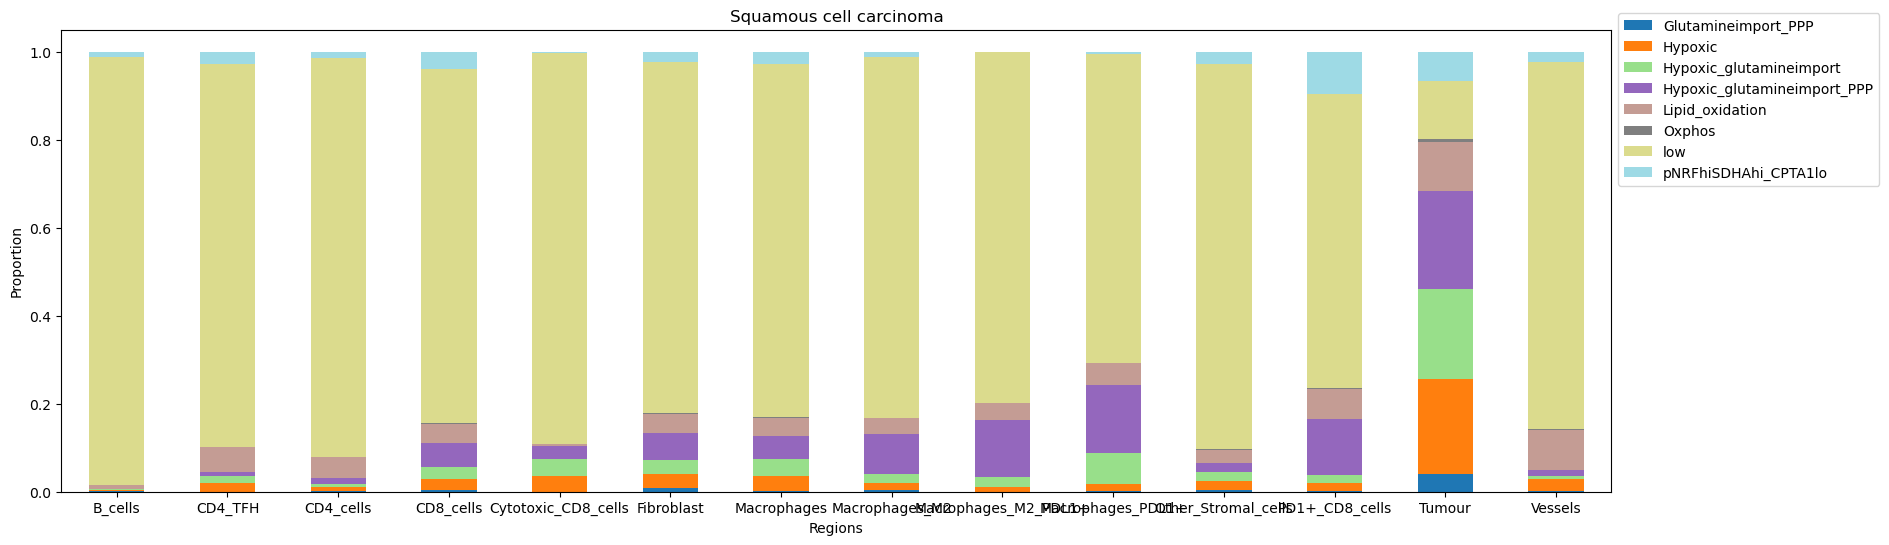

In [473]:
plt.figure(figsize=(12, 3), dpi = 300)

nb_comp_squamous.plot(kind='bar', 
                    stacked=True, 
                 
                    figsize=(20, 6),cmap="tab20", )

plt.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 1.05))

plt.xlabel("Regions")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.title("Squamous cell carcinoma")
#plt.savefig("box_plot_whole_slide_NE_cellProportion.svg", dpi=300, bbox_inches="tight")


plt.show()

<Figure size 3600x900 with 0 Axes>

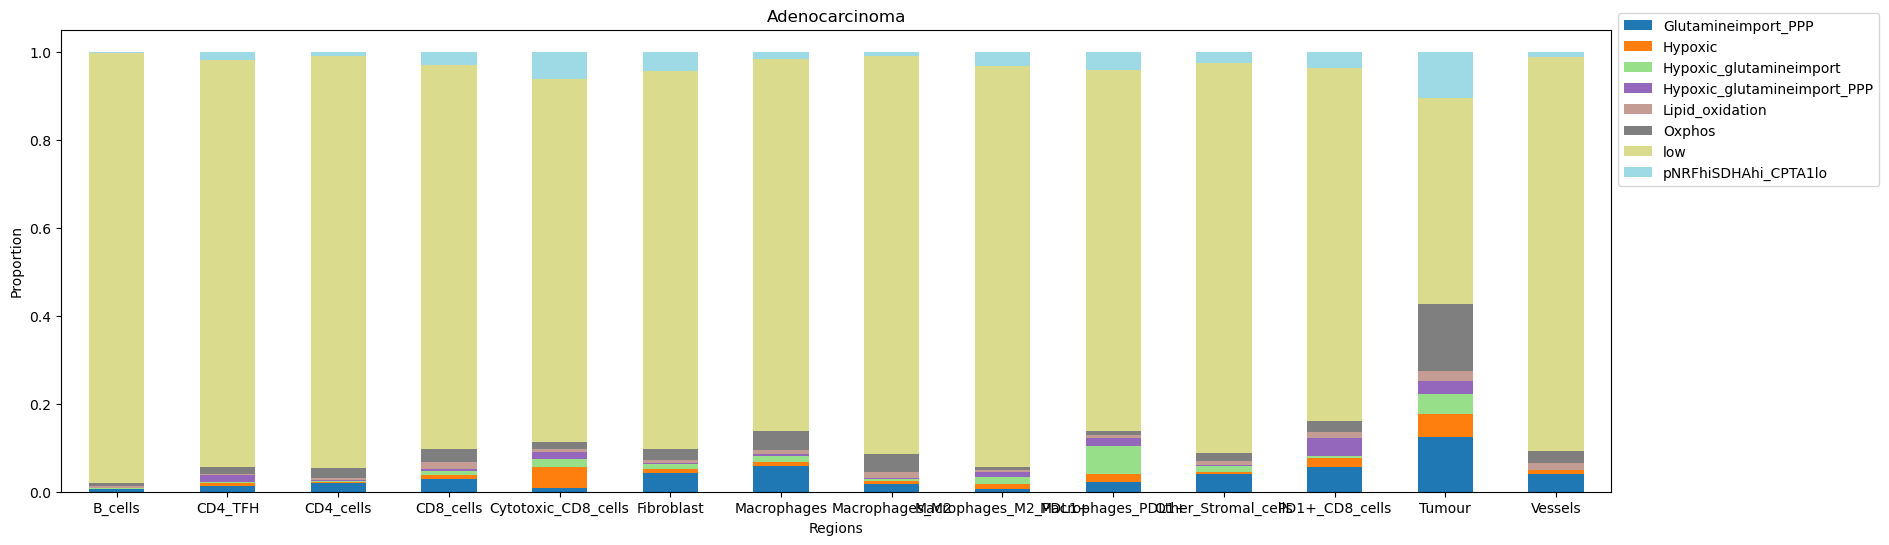

In [475]:
plt.figure(figsize=(12, 3), dpi = 300)

nb_comp_adeno.plot(kind='bar', 
                    stacked=True, 
                 
                    figsize=(20, 6),cmap="tab20", )

plt.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 1.05))

plt.xlabel("Regions")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.title("Adenocarcinoma")
#plt.savefig("box_plot_whole_slide_NE_cellProportion.svg", dpi=300, bbox_inches="tight")


plt.show()

In [476]:
nb_comp_adeno_p = pd.crosstab(columns=adeno['CT_basetumour'],
                                    index=adeno['protein_exp_nb'],
                                    normalize="index")

nb_comp_squamous_p = pd.crosstab(columns=squamous['CT_basetumour'],
                                    index=squamous['protein_exp_nb'],
                                    normalize="index")

<Figure size 3600x900 with 0 Axes>

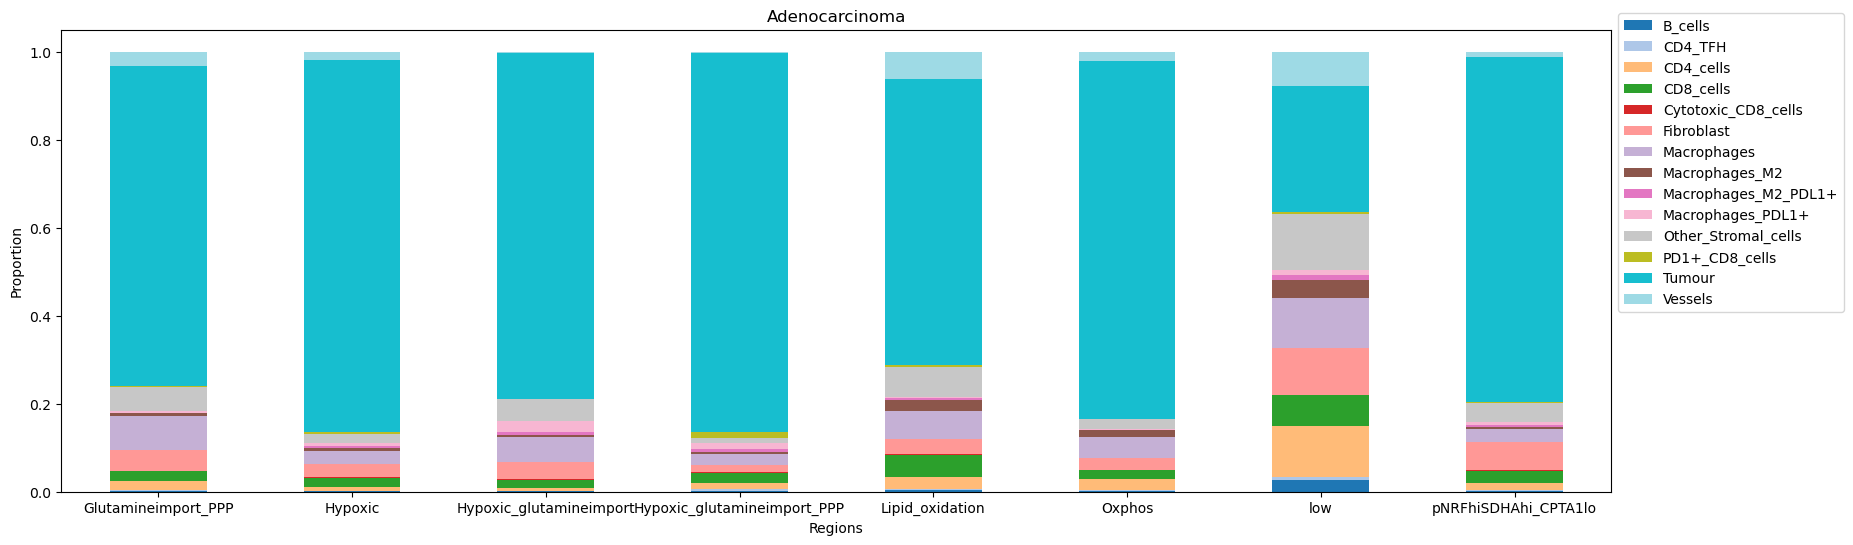

In [477]:
plt.figure(figsize=(12, 3), dpi = 300)

nb_comp_adeno_p.plot(kind='bar', 
                    stacked=True, 
                 
                    figsize=(20, 6),cmap="tab20", )

plt.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 1.05))

plt.xlabel("Regions")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.title("Adenocarcinoma")
#plt.savefig("box_plot_whole_slide_NE_cellProportion.svg", dpi=300, bbox_inches="tight")


plt.show()

<Figure size 3600x900 with 0 Axes>

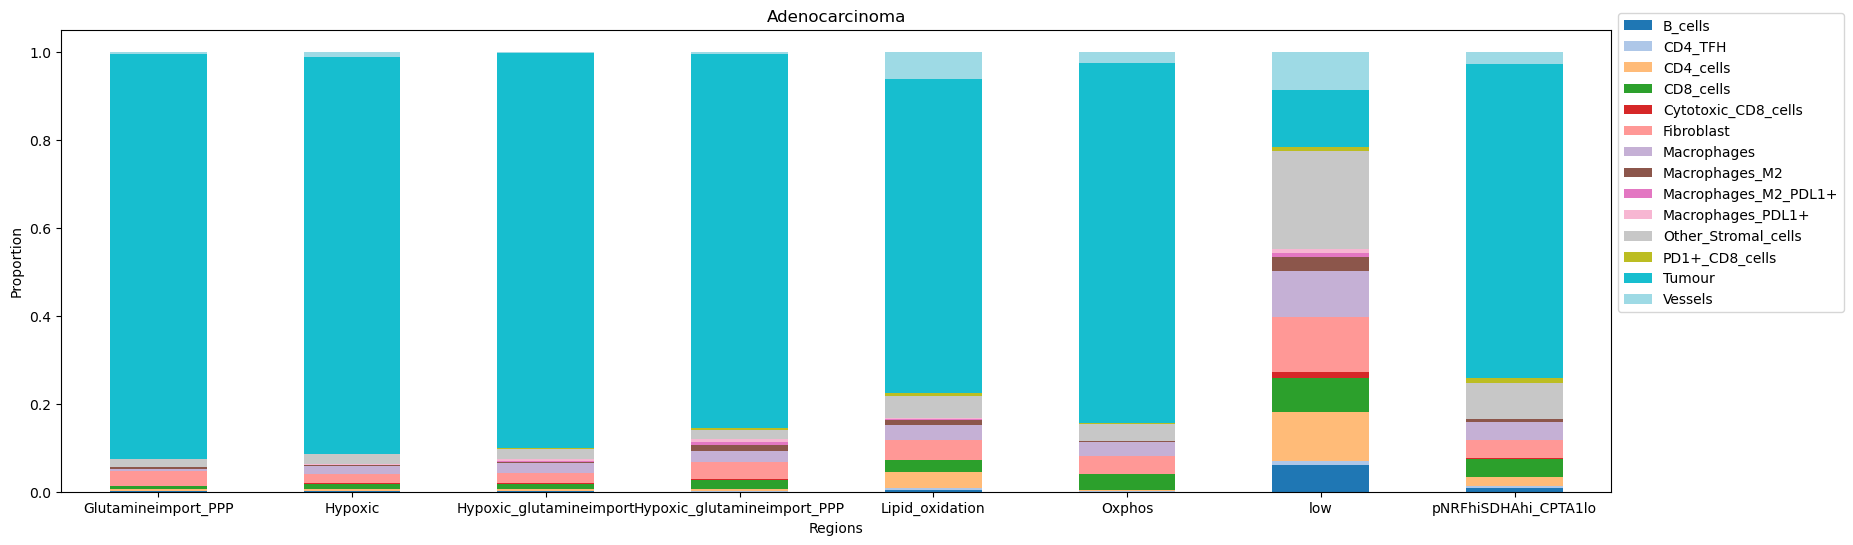

In [478]:
plt.figure(figsize=(12, 3), dpi = 300)

nb_comp_squamous_p.plot(kind='bar', 
                    stacked=True, 
                 
                    figsize=(20, 6),cmap="tab20", )

plt.legend(loc="upper left", ncol=1, bbox_to_anchor=(1, 1.05))

plt.xlabel("Regions")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.title("Adenocarcinoma")
#plt.savefig("box_plot_whole_slide_NE_cellProportion.svg", dpi=300, bbox_inches="tight")


plt.show()

# Proportion

In [430]:
log_prop = proportion_df
columns = [ 'Glutamineimport_PPP', 'Hypoxic',
       'Hypoxic_glutamineimport', 'Hypoxic_glutamineimport_PPP',
       'Lipid_oxidation', 'Oxphos', 'low', 'pNRFhiSDHAhi_CPTA1lo']

for column in columns: 
    log_prop[column] = np.log(log_prop[column])

log_prop

,unique_core,Glutamineimport_PPP,Hypoxic,Hypoxic_glutamineimport,Hypoxic_glutamineimport_PPP,Lipid_oxidation,Oxphos,low,pNRFhiSDHAhi_CPTA1lo,Histology,Relapse,Relapse_followup
0,TMA_A_A1,-inf,-4.072951,-inf,-inf,-inf,-0.235867,-1.644614,-inf,Adenocarcinoma,No,1968
1,TMA_A_A2,-inf,-3.626436,-3.881998,-inf,-2.622145,-4.504876,-0.557210,-1.216474,Squamous,Yes,234
2,TMA_A_A3,-inf,-inf,-5.514957,-inf,-inf,-8.882253,-0.006546,-6.049040,Adenocarcinoma,Yes,233
3,TMA_A_A4,-2.676015,-inf,-inf,-inf,-inf,-6.637560,-0.072729,-inf,Adenocarcinoma,No,1204
4,TMA_A_A5,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,-inf,Squamous,Yes,907
...,...,...,...,...,...,...,...,...,...,...,...,...
114,TMA_B_J2,-5.617226,-6.472892,-3.339958,-inf,-3.602323,-5.544905,-0.772842,-0.762465,Adenocarcinoma,Yes,2262
115,TMA_B_J3,-3.331759,-inf,-1.201648,-5.430089,-5.924107,-inf,-0.452654,-3.883609,Adenocarcinoma,No,995
116,TMA_B_J4,-5.640904,-inf,-inf,-inf,-5.685356,-inf,-0.006969,-inf,Adenocarcinoma,Yes,214
117,TMA_B_J7,-7.038016,-inf,-inf,-inf,-2.347815,-7.731163,-0.102098,-8.711992,Adenocarcinoma,No,2558


<Axes: xlabel='Glutamineimport_PPP', ylabel='Hypoxic'>

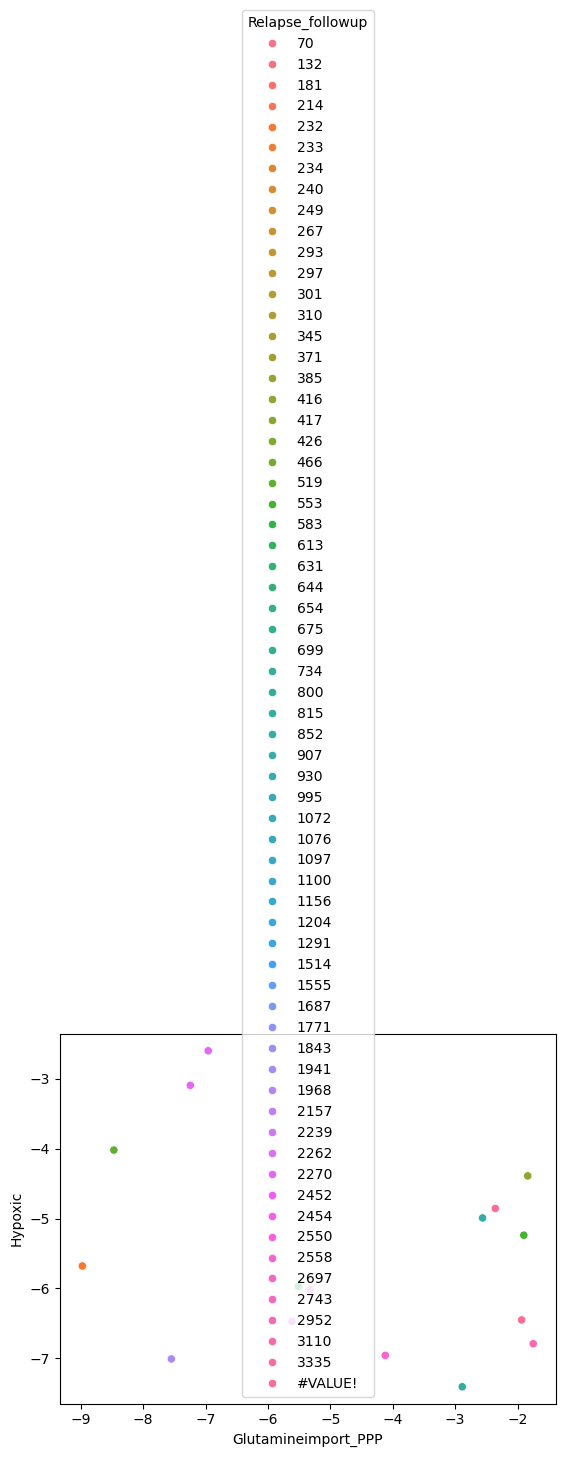

In [433]:
sns.scatterplot(data = log_prop, x= 'Glutamineimport_PPP', y ='Hypoxic', hue = 'Relapse_followup')

<Axes: xlabel='Glutamineimport_PPP', ylabel='Hypoxic'>

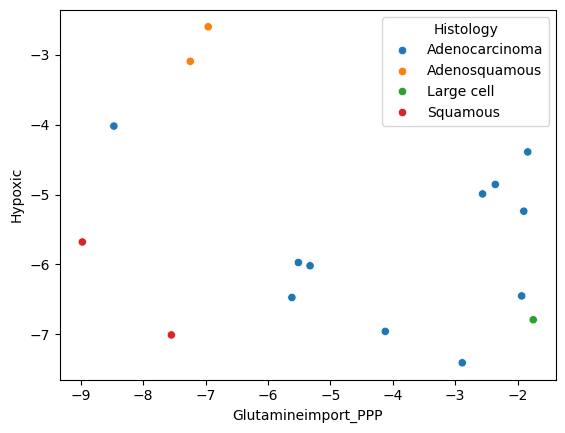

In [434]:
sns.scatterplot(data = log_prop, x= 'Glutamineimport_PPP', y ='Hypoxic', hue = 'Histology')


In [436]:
log_prop.columns

Index(['unique_core', 'Glutamineimport_PPP', 'Hypoxic',
       'Hypoxic_glutamineimport', 'Hypoxic_glutamineimport_PPP',
       'Lipid_oxidation', 'Oxphos', 'low', 'pNRFhiSDHAhi_CPTA1lo', 'Histology',
       'Relapse', 'Relapse_followup'],
      dtype='object')

<Axes: xlabel='Hypoxic_glutamineimport', ylabel='pNRFhiSDHAhi_CPTA1lo'>

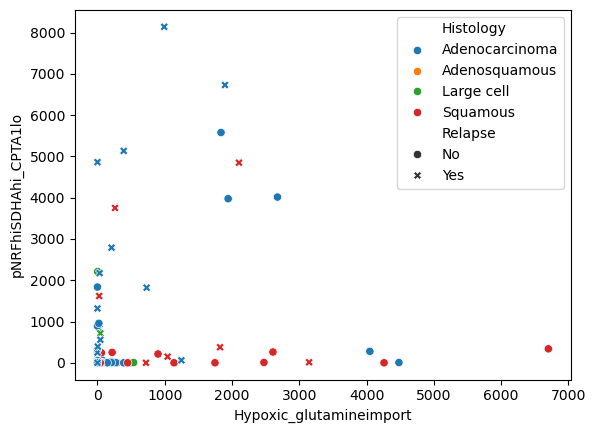

In [461]:
sns.scatterplot(data = counts_df, x= 'Hypoxic_glutamineimport', y ='pNRFhiSDHAhi_CPTA1lo', hue = 'Histology', style = 'Relapse')


array([[<Axes: title={'center': 'Oxphos'}>]], dtype=object)

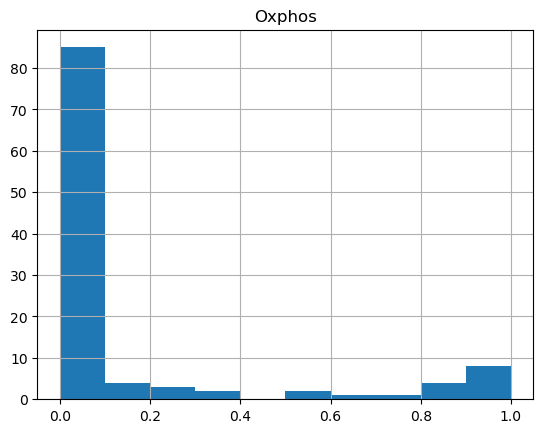

In [418]:
prop_nolow.hist(column= 'Oxphos',# by ='Histology',
               bins = 10)

/tmp/ipykernel_25087/1445668292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df.hist(column= 'Hypoxic_glutamineimport_PPP', by ='Relapse', bins = 15)
/tmp/ipykernel_25087/1445668292.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df.hist(column= 'Hypoxic', by ='Relapse')


array([[<Axes: title={'center': 'Hypoxic'}>]], dtype=object)

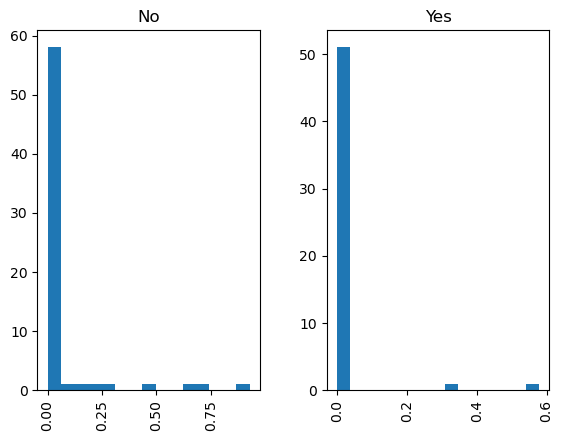

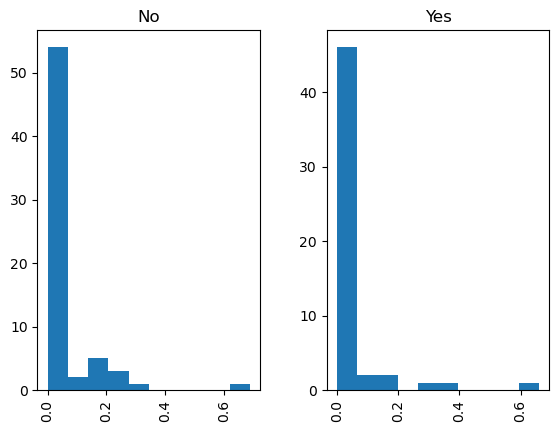

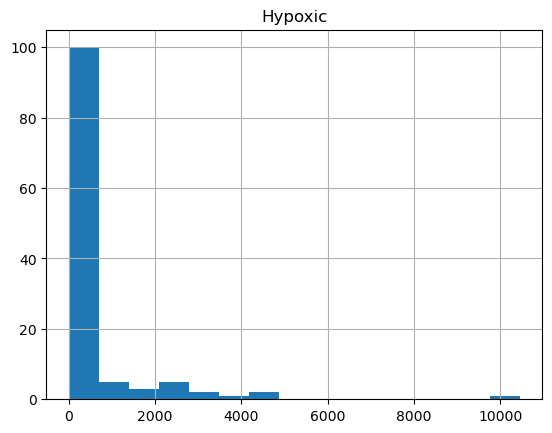

In [386]:
proportion_df.hist(column= 'Hypoxic_glutamineimport_PPP', by ='Relapse', bins = 15)
proportion_df.hist(column= 'Hypoxic', by ='Relapse')
counts_df.hist(column= 'Hypoxic', bins =15)